# This Code will help us to Automate the Main 4ORG File, which we used to do manually in Excel.
Step Followed:
1. Imported the Main File.
2. Analysing the data and Removing the one month Data.
3. Working with Date Column.
4. Checking for null values if any.
5. Saving the file in CSV Format.
6. Importing the current Month File.
7. Renaming the columns.
8. Re-arranging the columns as per the main file.
9. Importing the Friendly file
10. Renaming Columns in the Friendly file.
11. Using inner joins to merge the two files.
12. Using replace function to replace hit and miss values with 0 and 1
13. Saving the file in excel.

In [151]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from openpyxl.utils.cell import get_column_letter
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [153]:
#importing the dataset:
df = pd.read_csv("C:/Users/BBiswal110876/Desktop/Navigation bar/4 org Feb '22 - Jul '22 - FINAL Excel.csv",low_memory=False)
df.fillna(0)
df.head()
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [154]:
#checking the shape:
df.head()

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Supervisor_New,Friendly_name,Organization_1,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_

In [155]:
#Check the Dtype for Date field:
df['Date_Time'].dtypes

dtype('O')

In [156]:
#Working with Date Column:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)
df['Date_Time'].head()

0   2022-01-02 01:44:00
1   2022-01-02 02:56:00
2   2022-01-02 04:37:00
3   2022-01-02 05:03:00
4   2022-01-02 05:41:00
Name: Date_Time, dtype: datetime64[ns]

In [157]:
#parsing the Date Column:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format="%Y-%d-%m %H:%M:%S")
df['Date_Time'].head()

0   2022-01-02 01:44:00
1   2022-01-02 02:56:00
2   2022-01-02 04:37:00
3   2022-01-02 05:03:00
4   2022-01-02 05:41:00
Name: Date_Time, dtype: datetime64[ns]

In [158]:
#Checking the current time period:
x = pd.datetime.now()
x.month, x.year

(9, 2022)

In [159]:
#Checking the Month Field:
df["Month_1"].unique()

array(["February '22", "March '22", "April '22", "May '22", "June '22",
       "July '22"], dtype=object)

In [160]:
#Checking the Null Values:
df.isnull().values.any()

False

In [161]:
#Check the shape of the dataset.
df.shape

(134081, 495)

In [162]:
#Dropping all the nan values from the column:
#df = df.dropna(axis=0, how='all')

In [163]:
#chaecking the shape of the data:
df.shape

(134081, 495)

                                                    Total Missing Value
Eureka_ID                                                             0
CorrelationID                                                         0
Queue_ID                                                              0
Queue_Name                                                            0
Supervisor_New                                                        0
Friendly_name                                                         0
Organization_1                                                        0
Date_Time                                                             0
Month_1                                                               0
Recorder_ID                                                           0
Average_Confidence                                                    0
Percent_Silence                                                       0
Longest_Silence                                                 

<AxesSubplot:>

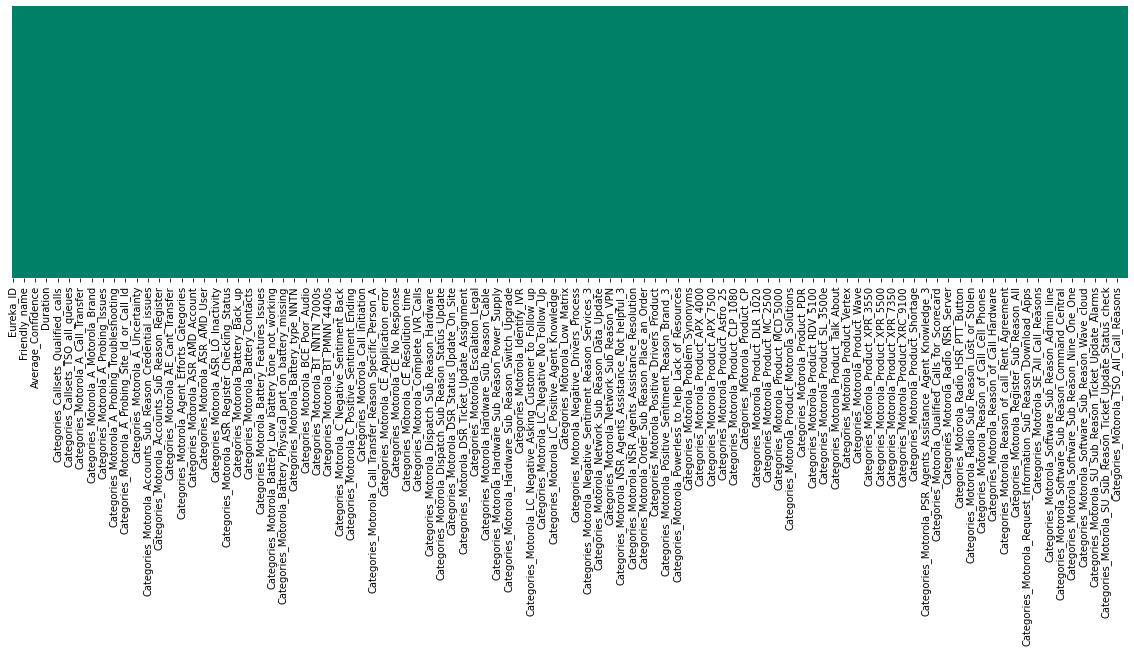

In [164]:
#Checking if any nan value is present.
#Checking the null values in the dataset:
#import warnings:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [165]:
#Dropping one month data:
#df.drop(df[df['Month_1'] == "December '21"].index, inplace = True)

In [166]:
#Dropping one month data:
exclude = ["February '22"]
df = df[~(df["Month_1"].isin(exclude))]

In [167]:
#Checking the Month Field:
df["Month_1"].unique()

array(["March '22", "April '22", "May '22", "June '22", "July '22"],
      dtype=object)

In [168]:
#print(df['Queue_Name'].value_counts()['TechTriage_WatchGuard'])

In [169]:
#Checking no of rows and columns:
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  108951
No. of columns =  495


In [170]:
#Adding new Categories:
df = df.reindex(columns = df.columns.tolist()
                                  + ['Categories_Motorola_Sentiment4_C_Negative_Sentiment_4',
                                    'Categories_Motorola_Sentiment4_C_Positive Sentiment_4',
                                    'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Out_of_Scope_4',
                                    'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Escalation_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_Asking_Customer_to_Follow_up_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_Frustration_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_Longer_Hold_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_Multiple_Transfers_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_No_Follow_Up_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_No_Resolution_Resolution_Time_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_Poor_Audio_4',
                                    'Categories_Motorola_Sentiment_4_LC_Negative_Receiving_Multiple_Calls_4',
                                    'Categories_Motorola_Sentiment_4_LC_Positive_Accent_4',
                                    'Categories_Motorola_Sentiment_4_LC_Positive_Communication_4',
                                    'Categories_Motorola_Sentiment_4_LC_Positive_Power_words_4',
                                    'Categories_Motorola_Sentiment_4_LC_Positive_Resolution_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Agent`s_Assistance_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Brand_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Escalation_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Powerless_to_help_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Product_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Services_4',
                                    'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Workflow_Disruptions_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Call_Fronting_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Can`t_Transfer_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Dropped_Ball_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Routing_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Tech_Unavailable_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Unsupported_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Lied_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Needs_Attention_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Not_helpful_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Rude_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Brand_Brand_Transition_Reputation_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Dissatisfaction_Keywords_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Services_Busy_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Services_Customer_Service_Support_4',
                                    'Categories_Motorola_Sentiment_4_NSR_Services_Threatening_Cancellation_4',
                                    'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Agent`s_Assistance_4',
                                    'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Brand_4',
                                    'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Product_4',
                                    'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Services_4',
                                    'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Access_4',
                                    'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Information_4',
                                    'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Resource_4',
                                    'Categories_Motorola_Sentiment_4_Powerless_to_help_Not_under_agent`s_control_4',
                                    'Categories_Motorola_Sentiment_4_Product_Shortage',
                                    'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Above_Beyond_Service_4',
                                    'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Agent_Knowledge_4',
                                    'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Immediate_Resolution_4'])

In [171]:
#Re-Arranging the columns:
df1 = df[['Eureka_ID',
         'CorrelationID',
         'Queue_ID',
         'Queue_Name',
         'Supervisor_New',
         'Friendly_name',
         'Organization_1',
         'Date_Time',
         'Month_1',       
         'Recorder_ID',
         'Average_Confidence',
         'Percent_Silence',
         'Longest_Silence',
         'Tempo',
         'Silence_Time',
         'Duration',
         'Categories_Callsets_CC_all_queues',
         'Categories_Callsets_Dispatch_All_queues',
         'Categories_Callsets_NOC_All_queues',
         'Categories_Callsets_Practice_callset_temporary',
         'Categories_Callsets_Qualified_calls',
         'Categories_Callsets_Qualified_Calls_Watchguard',
         'Categories_Callsets_SE_all_queues',
         'Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues',
         'Categories_Callsets_TSO_and_SE_All_queues',
         'Categories_Callsets_TSO_all_queues',
         'Categories_Imported_Transfer_Language',
         'Categories_Motorola_A_Asking_for_further_assistance',
         'Categories_Motorola_A_Assurance_Statement',
         'Categories_Motorola_A_Branding',
         'Categories_Motorola_A_Call_Transfer',
         'Categories_Motorola_A_Confidence_Language',
         'Categories_Motorola_A_Hold_Asking_for_permission',
         'Categories_Motorola_A_Hold_Thanking_customer',
         'Categories_Motorola_A_HoldConfirmation',
         'Categories_Motorola_A_Motorola_Brand',
         'Categories_Motorola_A_Next_Steps',
         'Categories_Motorola_A_Probing_Version',
         'Categories_Motorola_A_Probing_Account_ID_or_Name',
         'Categories_Motorola_A_Probing_General',
         'Categories_Motorola_A_Probing_Issues',
         'Categories_Motorola_A_Probing_Organization_Name',
         'Categories_Motorola_A_Probing_Personal_Info',
         'Categories_Motorola_A_Probing_Server',
         'Categories_Motorola_A_Probing_Ticket_Number',
         'Categories_Motorola_A_Probing_Troubleshooting',
         'Categories_Motorola_A_Probing_Device_Details',
         'Categories_Motorola_A_Probing_Dispatch',
         'Categories_Motorola_A_Probing_OBA',
         'Categories_Motorola_A_Probing_Order',
         'Categories_Motorola_A_Probing_Site_Id_or_Call_Id',
         'Categories_Motorola_A_Probing_System_Id',
         'Categories_Motorola_A_Recap_Resolution',
         'Categories_Motorola_A_Redact',
         'Categories_Motorola_A_Self_Introduction',
         'Categories_Motorola_A_Uncertainty',
         'Categories_Motorola_A_Unprofessionalism',
         'Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete',
         'Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices',
         'Categories_Motorola_Accounts_Sub_Reason_Contract',
         'Categories_Motorola_Accounts_Sub_Reason_Credential_issues',
         'Categories_Motorola_Accounts_Sub_Reason_ELS',
         'Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License',
         'Categories_Motorola_Accounts_Sub_Reason_Locked_out',
         'Categories_Motorola_Accounts_Sub_Reason_Login',
         'Categories_Motorola_Accounts_Sub_Reason_Register',
         'Categories_Motorola_Accounts_Sub_Reason_Register_login_issues',
         'Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo',
         'Categories_Motorola_Accounts_Sub_Reason_Warranty',
         'Categories_Motorola_Active_Listening',
         'Categories_Motorola_AE_Cant_Transfer',
         'Categories_Motorola_AE_internet_issues',
         'Categories_Motorola_AE_Static,_Recording_issue',
         'Categories_Motorola_AE_System_Issue',
         'Categories_Motorola_Agent_being_certain',
         'Categories_Motorola_Agent_Efforts_Categories',
                'Categories_Motorola_Agent_making_the_customer_repeat',
                'Categories_Motorola_AP_MS_NOC_bilingual_calls',
                'Categories_Motorola_Asking_Customer_to_Repeat_Agent',
                'Categories_Motorola_ASR_LSR_Reset_Password',
                'Categories_Motorola_ASR_AMD_Account',
                'Categories_Motorola_ASR_AMD_Device',
                'Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial',
                'Categories_Motorola_ASR_AMD_Payment_Mode_or_Details',
                'Categories_Motorola_ASR_AMD_Subscription',
                'Categories_Motorola_ASR_AMD_User',
                'Categories_Motorola_ASR_CI_Incorrect',
                'Categories_Motorola_ASR_LSR_Help_Logging_In',
                'Categories_Motorola_ASR_LO_Incorrect',
                'Categories_Motorola_ASR_CI_Forgot',
                'Categories_Motorola_ASR_LO_Inactivity',
                'Categories_Motorola_ASR_LO_Too_Many_Attempts',
                'Categories_Motorola_ASR_LSR_Credentials',
                'Categories_Motorola_ASR_LSR_Locked_Out',
                'Categories_Motorola_ASR_Register_Account',
                'Categories_Motorola_ASR_Register_Checking_Status',
                'Categories_Motorola_ASR_Register_Device',
                'Categories_Motorola_ASR_Register_ID_Entitlement',
                'Categories_Motorola_ASR_Register_User',
                'Categories_Motorola_Battery_light_blinking_or_flashing',
                'Categories_Motorola_Battery_Back_up',
                'Categories_Motorola_Battery_Bad_Quality',
                'Categories_Motorola_Battery_Bulged_battery',
                'Categories_Motorola_Battery_Charge_Issues',
                'Categories_Motorola_Battery_Charger',
                'Categories_Motorola_Battery_Contacts',
                'Categories_Motorola_Battery_Cover_Plate_Issues',
                'Categories_Motorola_Battery_Dead_or_Failing',
                'Categories_Motorola_Battery_Display_Issues',
                'Categories_Motorola_Battery_Extended_battery_select_mode',
                'Categories_Motorola_Battery_Features_Issues',
                'Categories_Motorola_Battery_Generic',
                'Categories_Motorola_Battery_Hardware_Issues',
                'Categories_Motorola_Battery_Incompatible',
                'Categories_Motorola_Battery_Life',
                'Categories_Motorola_Battery_Low_battery_tone_not_working',
                'Categories_Motorola_Battery_Mentions',
                'Categories_Motorola_Battery_Modules',
                'Categories_Motorola_Battery_Order_Related',
                'Categories_Motorola_Battery_Over_Heating',
                'Categories_Motorola_Battery_Physical_part_on_battery_missing',
                'Categories_Motorola_Battery_RI',
                'Categories_Motorola_Battery_Shortage',
                'Categories_Motorola_Battery_Warranty',
                'Categories_Motorola_Battery_Replacement',
                'Categories_Motorola_Battery_type_NNTN',
                'Categories_Motorola_Battery_Type_PMNN',
                'Categories_Motorola_BCE_Multiple_Transfer',
                'Categories_Motorola_BCE_Negative_No_Resolution',
                'Categories_Motorola_BCE_NSR_Agents_Assistance',
                'Categories_Motorola_BCE_Poor_Audio',
                'Categories_Motorola_BCE_Recurring_issues',
                'Categories_Motorola_BCE_No_Follow_Up',
                'Categories_Motorola_BT_NNTN_4000s',
                'Categories_Motorola_BT_NNTN_6000s',
                'Categories_Motorola_BT_NNTN_7000s',
                'Categories_Motorola_BT_NNTN_8000s',
                'Categories_Motorola_BT_PMNN_4000s',
                'Categories_Motorola_BT_PMNN_4100s',
                'Categories_Motorola_BT_PMNN_4200s',
                'Categories_Motorola_BT_PMNN_4400s',
                'Categories_Motorola_BT_PMNN_4500s',
                'Categories_Motorola_C_Negative_Sentiment',
                'Categories_Motorola_C_Negative_Sentiment_Ending',
                'Categories_Motorola_C_Negative_Sentiment_3',
                'Categories_Motorola_C_Negative_Sentiment_Back',
                'Categories_Motorola_C_Negative_Sentiment_beginning',
                'Categories_Motorola_C_Phone_System_Issues',
                'Categories_Motorola_C_Positive_Sentiment',
                'Categories_Motorola_C_Positive_Sentiment_Beginning',
                'Categories_Motorola_C_Positive_Sentiment_Ending',
                'Categories_Motorola_C_Positive_Sentiment_3',
                'Categories_Motorola_C_Positive_Sentiment_Back',
                'Categories_Motorola_C_Unprofessionalism',
                'Categories_Motorola_Call_back_synonyms',
                'Categories_Motorola_Call_Initiation',
                'Categories_Motorola_Call_Transfer_Reason',
                'Categories_Motorola_Call_Transfer_Reason_Powerless_to_Help_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Department_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Department_C',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Person_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Person_C',
                'Categories_Motorola_Call_Transfer_Reason_Wrong_Department',
                'Categories_Motorola_CC_All_Call_Reasons',
                'Categories_Motorola_CE_Agents_Assistance',
                'Categories_Motorola_CE_Application_error',
                'Categories_Motorola_CE_Connection_issues',
                'Categories_Motorola_CE_Excessive_dead_air',
                'Categories_Motorola_CE_Improper_Transfer',
                'Categories_Motorola_CE_Multiple_Transfer',
                'Categories_Motorola_CE_No_Response',
                'Categories_Motorola_CE_Powerless_to_help',
                'Categories_Motorola_CE_Previous_Call_Disconnected',
                'Categories_Motorola_CE_Process_requirement',
                'Categories_Motorola_CE_Recurring_issues',
                'Categories_Motorola_CE_Resolution_time',
                'Categories_Motorola_Channel_Partner_AT_and_T',
                'Categories_Motorola_Channel_Partner_Carousel',
                'Categories_Motorola_Channel_Partner_Centurylink',
                'Categories_Motorola_Channel_Partner_Frontier',
                'Categories_Motorola_Complete_IVR_Calls',
                'Categories_Motorola_Critical_Matrix',
                'Categories_Motorola_Customer_Efforts_Categories',
                'Categories_Motorola_Dispatch_Entities',
                'Categories_Motorola_Dispatch_Sub_Reason_Accounts',
                'Categories_Motorola_Dispatch_Sub_Reason_Hardware',
                'Categories_Motorola_Dispatch_Sub_Reason_Network',
                'Categories_Motorola_Dispatch_Sub_Reason_Replacement',
                'Categories_Motorola_Dispatch_Sub_Reason_Request_Information',
                'Categories_Motorola_Dispatch_Sub_Reason_Software',
                'Categories_Motorola_Dispatch_Sub_Reason_Status_Update',
                'Categories_Motorola_DSR_Replacement_Advance_replacement',
                'Categories_Motorola_DSR_Replacement_Return_Authorization',
                'Categories_Motorola_DSR_Status_Check_Providing',
                'Categories_Motorola_DSR_Status_Check_Requesting',
                'Categories_Motorola_DSR_Status_Update_On_Site',
                'Categories_Motorola_DSR_Status_Update_Site_Update',
                'Categories_Motorola_DSR_Status_Update_Ticket_update',
                'Categories_Motorola_DSR_Ticket_Update_Deferral',
                'Categories_Motorola_DSR_Ticket_Update_Alarms',
                'Categories_Motorola_DSR_Ticket_Update_Assignment',
                'Categories_Motorola_DSR_Ticket_Update_Channel',
                'Categories_Motorola_DSR_Ticket_Update_RI',
                'Categories_Motorola_DSR_Ticket_Update_Status_check',
                'Categories_Motorola_Error_code',
                'Categories_Motorola_Escalation_Legal',
                'Categories_Motorola_Escalations',
                'Categories_Motorola_First_Person_Pronoun',
                'Categories_Motorola_Greeting',
                'Categories_Motorola_Hardware_Sub_Reason_Screen',
                'Categories_Motorola_Hardware_Sub_Reason_Cable',
                'Categories_Motorola_Hardware_Sub_Reason_Generator',
                'Categories_Motorola_Hardware_Sub_Reason_Headset',
                'Categories_Motorola_Hardware_Sub_Reason_Keypad',
                'Categories_Motorola_Hardware_Sub_Reason_MAC_Address',
                'Categories_Motorola_Hardware_Sub_Reason_Power_Supply',
                'Categories_Motorola_Hardware_Sub_Reason_Repair',
                'Categories_Motorola_Hardware_sub_reason_Replacement',
                'Categories_Motorola_Hardware_Sub_Reason_Router',
                'Categories_Motorola_Hardware_Sub_Reason_Speakers',
                'Categories_Motorola_Hardware_Sub_Reason_Switch_Upgrade',
                'Categories_Motorola_High_Matrix',
                'Categories_Motorola_Hold_behaviors',
                'Categories_Motorola_Hold_Identifier',
                'Categories_Motorola_Identifier_Spanish',
                'Categories_Motorola_Identify_IVR',
                'Categories_Motorola_Internal_call_Identifier',
                'Categories_Motorola_Lack_of_Access_Sub_Reason_Out_of_Scope',
                'Categories_Motorola_Lack_of_Access_Sub_Reason_Escalation',
                'Categories_Motorola_Language_Barrier',
                'Categories_Motorola_LC_Negative_Asking_Customer_to_Follow_up',
                'Categories_Motorola_LC_Negative_Frustration',
                'Categories_Motorola_LC_Negative_High_CE',
                'Categories_Motorola_LC_Negative_Longer_Hold',
                'Categories_Motorola_LC_Negative_Multiple_Transfers',
                'Categories_Motorola_LC_Negative_No_Follow_Up',
                'Categories_Motorola_LC_Negative_No_Resolution',
                'Categories_Motorola_LC_Negative_Poor_Audio',
                'Categories_Motorola_LC_Negative_Receiving_Multiple_Calls',
                'Categories_Motorola_LC_Positive_Accent',
                'Categories_Motorola_LC_Positive_Agent_Knowledge',
                'Categories_Motorola_LC_Positive_Communication',
                'Categories_Motorola_LC_Positive_Power_Words',
                'Categories_Motorola_LC_Positive_Satisfaction',
                'Categories_Motorola_Longest_Silence',
                'Categories_Motorola_Low_Matrix',
                'Categories_Motorola_Major_Reason_of_Call_Software',
                'Categories_Motorola_Mono_Identifier',
                'Categories_Motorola_Negation',
                'Categories_Motorola_Negative_Drivers_People',
                'Categories_Motorola_Negative_Drivers_Process',
                'Categories_Motorola_Negative_Intensifier',
                'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance',
                'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance_3',
                'Categories_Motorola_Negative_Sentiment_Reason_Services',
                'Categories_Motorola_Negative_Sentiment_Reason_Services_3',
                'Categories_Motorola_Negative_Sentiment_Reason_Product',
                'Categories_Motorola_Negative_Sentiment_Reason_Product_3',
                'Categories_Motorola_Negative_Sentiments_with_Reasons',
                'Categories_Motorola_Network_Sub_Reason_Connectivity',
                'Categories_Motorola_Network_Sub_Reason_Data_Update',
                'Categories_Motorola_Network_sub_reason_Firewall',
                'Categories_Motorola_Network_Sub_Reason_Gateway',
                'Categories_Motorola_Network_Sub_Reason_IP_Change',
                'Categories_Motorola_Network_Sub_Reason_TRR',
                'Categories_Motorola_Network_Sub_Reason_VPN',
                'Categories_Motorola_No_Caller_Calls',
                'Categories_Motorola_No_Recap_Required',
                'Categories_Motorola_NOC_All_Call_Reasons',
                'Categories_Motorola_NSR_Agents_Assistance_Not_helpful',
                'Categories_Motorola_NSR_Agents_Assistance_Not_helpful_3',
                'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help',
                'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help_3',
                'Categories_Motorola_NSR_Agents_Assistance_Rude',
                'Categories_Motorola_NSR_Agents_Assistance_Rude_3',
                'Categories_Motorola_NSR_Agents_Assistance_Resolution',
                'Categories_Motorola_NSR_Agents_Assistance_Resolution_3',
                'Categories_Motorola_Order_Sub_Reason_Configuration_Price_Quote',
                'Categories_Motorola_Order_Sub_Reason_Order_Issues',
                'Categories_Motorola_Order_Sub_Reason_Payments',
                'Categories_Motorola_Order_Sub_Reason_Place_an_Order',
                'Categories_Motorola_Order_Sub_Reason_Special_Price',
                'Categories_Motorola_Order_Sub_reason_Status_update',
                'Categories_Motorola_Other_Vendors',
                'Categories_Motorola_Positive_Drivers_People',
                'Categories_Motorola_Positive_Drivers_Product',
                'Categories_Motorola_Positive_intensifier',
                'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance',
                'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance_3',
                'Categories_Motorola_Positive_Sentiment_Reason_Brand',
                'Categories_Motorola_Positive_Sentiment_Reason_Brand_3',
                'Categories_Motorola_Positive_Sentiment_Reason_Product',
                'Categories_Motorola_Positive_Sentiment_Reason_Product_3',
                'Categories_Motorola_Powerless_to_help_Lack_of_Access',
                'Categories_Motorola_Powerless_to_help_Lack_of_Information',
                'Categories_Motorola_Powerless_to_help_Lack_of_Resources',
                'Categories_Motorola_Powerless_to_help_Not_under_Agents_Control',
                'Categories_Motorola_Powerless_to_help_Uncertain',
                'Categories_Motorola_Pricing',
                'Categories_Motorola_Probing_questions',
                'Categories_Motorola_Problem_Synonyms',
                'Categories_Motorola_Product_APX',
                'Categories_Motorola_Product_APX_1000',
                'Categories_Motorola_Product_APX_1500',
                'Categories_Motorola_Product_APX_2000',
                'Categories_Motorola_Product_APX_4000',
                'Categories_Motorola_Product_APX_4500',
                'Categories_Motorola_Product_APX_6000',
                'Categories_Motorola_Product_APX_6500',
                'Categories_Motorola_Product_APX_7000',
                'Categories_Motorola_Product_APX_7500',
                'Categories_Motorola_Product_APX_8000',
                'Categories_Motorola_Product_APX_8500',
                'Categories_Motorola_Product_APX_900',
                'Categories_Motorola_Product_APX_Radio',
                'Categories_Motorola_Product_Astro_25',
                'Categories_Motorola_Product_Body_worn_camera',
                'Categories_Motorola_Product_BPR_40',
                'Categories_Motorola_Product_Business_Online',
                'Categories_Motorola_Product_CDM_1250',
                'Categories_Motorola_Product_CLP_1080',
                'Categories_Motorola_Product_CM',
                'Categories_Motorola_Product_CM_200D',
                'Categories_Motorola_Product_CM_300D',
                'Categories_Motorola_Product_Command_Central',
                'Categories_Motorola_Product_CP',
                'Categories_Motorola_Product_CP_100',
                'Categories_Motorola_Product_CP_185',
                'Categories_Motorola_Product_CP_200',
                'Categories_Motorola_Product_CP_300',
                'Categories_Motorola_Product_DLR_1020',
                'Categories_Motorola_Product_Flex',
                'Categories_Motorola_Product_GCM_8000',
                'Categories_Motorola_Product_GTR_8000',
                'Categories_Motorola_Product_LEX',
                'Categories_Motorola_Product_MC_2500',
                'Categories_Motorola_Product_MCC',
                'Categories_Motorola_Product_MCC_5500',
                'Categories_Motorola_Product_MCC_7100',
                'Categories_Motorola_Product_MCC_7500',
                'Categories_Motorola_Product_MCD_5000',
                'Categories_Motorola_Product_MCS',
                'Categories_Motorola_Product_ML_350',
                'Categories_Motorola_Product_Motorola_Online',
                'Categories_Motorola_Product_Motorola_Shop',
                'Categories_Motorola_Product_Motorola_Solutions',
                'Categories_Motorola_Product_MSR',
                'Categories_Motorola_Product_MT_series',
                'Categories_Motorola_Product_MX_Series',
                'Categories_Motorola_Product_MyView',
                'Categories_Motorola_Product_PDR',
                'Categories_Motorola_Product_PM_400',
                'Categories_Motorola_Product_PR',
                'Categories_Motorola_Product_Quantar',
                'Categories_Motorola_Product_RDU_4100',
                'Categories_Motorola_Product_RDV_5100',
                'Categories_Motorola_Product_RDW',
                'Categories_Motorola_Product_Repeater',
                'Categories_Motorola_Product_RXCDR,GSM',
                'Categories_Motorola_Product_SL_300',
                'Categories_Motorola_Product_SL_3500e',
                'Categories_Motorola_Product_SLR_8000',
                'Categories_Motorola_Product_Spectra',
                'Categories_Motorola_Product_Spillman',
                'Categories_Motorola_Product_Spirit',
                'Categories_Motorola_Product_Talk_About',
                'Categories_Motorola_Product_TLK',
                'Categories_Motorola_Product_TLK_100',
                'Categories_Motorola_Product_TLK_150',
                'Categories_Motorola_Product_TRBO_Gateway',
                'Categories_Motorola_Product_Vertex',
                'Categories_Motorola_Product_Vertex_2200_LTR',
                'Categories_Motorola_Product_VX_2000V',
                'Categories_Motorola_Product_VX_7200',
                'Categories_Motorola_Product_VX_351',
                'Categories_Motorola_Product_Wave',
                'Categories_Motorola_Product_XPR',
                'Categories_Motorola_Product_XPR_2500',
                'Categories_Motorola_Product_XPR_3300',
                'Categories_Motorola_Product_XPR_3500',
                'Categories_Motorola_Product_XPR_3550',
                'Categories_Motorola_Product_XPR_4360',
                'Categories_Motorola_Product_XPR_4380',
                'Categories_Motorola_Product_XPR_5300',
                'Categories_Motorola_Product_XPR_5350',
                'Categories_Motorola_Product_XPR_5500',
                'Categories_Motorola_Product_XPR_5550',
                'Categories_Motorola_Product_XPR_5580',
                'Categories_Motorola_Product_XPR_6350',
                'Categories_Motorola_Product_XPR_6550',
                'Categories_Motorola_Product_XPR_7350',
                'Categories_Motorola_Product_XPR_7550',
                'Categories_Motorola_Product_XPR_7580',
                'Categories_Motorola_Product_XRC',
                'Categories_Motorola_Product_XRC_9000',
                'Categories_Motorola_Product_XRC_9100',
                'Categories_Motorola_Product_XTL',
                'Categories_Motorola_Product_XTL_2500',
                'Categories_Motorola_Product_XTS_Series',
                'Categories_Motorola_Product_Information',
                'Categories_Motorola_Product_Shortage',
                'Categories_Motorola_Products',
                'Categories_Motorola_Professional',
                'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service',
                'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge',
                'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge_3',
                'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution',
                'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution_3',
                'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service_3',
                'Categories_Motorola_PTH_Alternate_Solution',
                'Categories_Motorola_Qualified_Calls_for_Scorecard',
                'Categories_Motorola_Qualified_CSAT',
                'Categories_Motorola_Radio_NSR_Bluetooth',
                'Categories_Motorola_Radio_NSR_Configuring',
                'Categories_Motorola_Radio_NSR_Connection_Communication',
                'Categories_Motorola_Radio_NSR_Server',
                'Categories_Motorola_Radio_NSR_WiFi_OTAP_Tethering',
                'Categories_Motorola_Radio_SSR_CPM',
                'Categories_Motorola_Radio_SSR_Downloading_Install',
                'Categories_Motorola_Radio_HSR_Battery_Charger',
                'Categories_Motorola_Radio_HSR_PTT_Button',
                'Categories_Motorola_Radio_HSR_Screen_and_Cracking',
                'Categories_Motorola_Radio_HSR_Volume',
                'Categories_Motorola_Radio_Sub_Reason_Accounts',
                'Categories_Motorola_Radio_Sub_Reason_Hardware',
                'Categories_Motorola_Radio_Sub_Reason_Lost_or_Stolen',
                'Categories_Motorola_Radio_Sub_Reason_Network',
                'Categories_Motorola_Radio_Sub_Reason_Software',
                'Categories_Motorola_Reason_of_Call_Accounts',
                'Categories_Motorola_Reason_of_Call_Asked_for_specific_person',
                'Categories_Motorola_Reason_of_Call_Cell_Phones',
                'Categories_Motorola_Reason_of_Call_Console_issues',
                'Categories_Motorola_Reason_of_call_Course_or_Training',
                'Categories_Motorola_Reason_of_Call_Dispatch',
                'Categories_Motorola_Reason_of_Call_Employment',
                'Categories_Motorola_Reason_of_Call_Hardware',
                'Categories_Motorola_Reason_of_call_Network',
                'Categories_Motorola_Reason_of_Call_Open_New_Ticket',
                'Categories_Motorola_Reason_of_call_Order',
                'Categories_Motorola_Reason_of_Call_Radio',
                'Categories_Motorola_Reason_of_call_Rent_Agreement',
                'Categories_Motorola_Reason_of_Call_Request_Information',
                'Categories_Motorola_Reason_of_Call_Roller',
                'Categories_Motorola_Reason_of_call_Status_Update',
                'Categories_Motorola_Recapping_Solution',
                'Categories_Motorola_Register_Sub_Reason_All',
                'Categories_Motorola_Repeat_Contact_Language_First_60',
                'Categories_Motorola_Repeat_Contact_Customer',
                'Categories_Motorola_Request_Information_Sub_Reason_Add_Device',
                'Categories_Motorola_Request_Information_Sub_Reason_Add_user',
                'Categories_Motorola_Request_Information_Sub_Reason_Download_Apps',
                'Categories_Motorola_Request_Information_Sub_Reason_Job',
                'Categories_Motorola_Request_Information_Sub_Reason_Logs',
                'Categories_Motorola_Request_Information_Sub_Reason_Parts',
                'Categories_Motorola_Resolution_provided',
                'Categories_Motorola_SE_All_Call_Reasons',
                'Categories_Motorola_Second_Person_Pronoun',
                'Categories_Motorola_Silence_time_morethan_60',
                'Categories_Motorola_Software_Sub_Reason_Access_Issues',
                'Categories_Motorola_Software_Sub_Reason_Activate_Device',
                'Categories_Motorola_Software_Sub_Reason_Admin_line',
                'Categories_Motorola_Software_Sub_Reason_Alert_issues',
                'Categories_Motorola_Software_Sub_Reason_Audio_or_Video',
                'Categories_Motorola_Software_Sub_Reason_CAD',
                'Categories_Motorola_Software_Sub_Reason_Call_Transfer,Connect',
                'Categories_Motorola_Software_Sub_Reason_Command_Central',
                'Categories_Motorola_Software_Sub_Reason_Connect_plus',
                'Categories_Motorola_Software_Sub_Reason_CPS',
                'Categories_Motorola_Software_Sub_Reason_Dispatch',
                'Categories_Motorola_Software_Sub_Reason_GPS_Or_Map_Issue',
                'Categories_Motorola_Software_Sub_Reason_Nine_One_One',
                'Categories_Motorola_Software_Sub_Reason_Reports_issue',
                'Categories_Motorola_Software_Sub_Reason_Server_Issues',
                'Categories_Motorola_Software_Sub_Reason_System_update',
                'Categories_Motorola_Software_Sub_Reason_Tip_manager',
                'Categories_Motorola_Software_Sub_Reason_Wave_cloud',
                'Categories_Motorola_Status_Update_Sub_Reason_Ticket_update',
                'Categories_Motorola_Status_Update_Sub_Reason_Site_Update',
                'Categories_Motorola_Status_Update_Sub_Reason_On_Site',
                'Categories_Motorola_Status_Update_Sub_Reason_Ticket_Closed',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Alarms',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Assignment',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Channel',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Deferral',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_RI',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Status_check',
                'Categories_Motorola_Third_Person_Pronoun',
                'Categories_Motorola_Ticket_created',
                'Categories_Motorola_Transfer_Language',
                'Categories_Motorola_Troubleshooting',
                'Categories_Motorola_TSO_All_Call_Reasons',
                'Categories_Motorola_Uncertainty_Nullifiers',
                'Categories_Motorola_Voicemail_Identifier',
                'Categories_Motorola_Wrong_Routed_Calls',
                 'Categories_Motorola_Sentiment4_C_Negative_Sentiment_4',
                 'Categories_Motorola_Sentiment4_C_Positive Sentiment_4',
                 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Out_of_Scope_4',
                 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Escalation_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Asking_Customer_to_Follow_up_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Frustration_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Longer_Hold_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Multiple_Transfers_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_No_Follow_Up_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_No_Resolution_Resolution_Time_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Poor_Audio_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Receiving_Multiple_Calls_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Accent_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Communication_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Power_words_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Resolution_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Agent`s_Assistance_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Brand_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Escalation_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Powerless_to_help_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Product_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Services_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Workflow_Disruptions_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Call_Fronting_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Can`t_Transfer_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Dropped_Ball_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Routing_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Tech_Unavailable_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Unsupported_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Lied_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Needs_Attention_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Not_helpful_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Rude_4',
                 'Categories_Motorola_Sentiment_4_NSR_Brand_Brand_Transition_Reputation_4',
                 'Categories_Motorola_Sentiment_4_NSR_Dissatisfaction_Keywords_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Busy_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Customer_Service_Support_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Threatening_Cancellation_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Agent`s_Assistance_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Brand_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Product_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Services_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Access_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Information_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Resource_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Not_under_agent`s_control_4',
                 'Categories_Motorola_Sentiment_4_Product_Shortage',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Above_Beyond_Service_4',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Agent_Knowledge_4',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Immediate_Resolution_4',
                 'Contact_Link']]

In [172]:
#Checking the top 3 count
df1.head(3)

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Supervisor_New,Friendly_name,Organization_1,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_

In [173]:
#Saving the file in CSV format:
df1.to_csv('final4ORG.csv', index = False)

In [219]:
#Importing the current month File
df = pd.read_csv("C:/Users/BBiswal110876/Downloads/SearchReport_2022_09_11_04_53.csv",low_memory=False)
#df.fillna(0)
df.head()
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [220]:
#Checking the shape
df.head()

,Eureka ID,Hits,Agent Disconnect Type,Average Delay,Call Connect Time,Calling Party Name,Calling Party Number,Contact Start Time,CorrelationID,Disposition Code,Email Address,Has Negative Sentiment,Has Positive Sentiment,Hold - Yes/No,IVR Disconnect Type,Jabber ID,Journey Link,Length (Text Contact),Level 1 Supervisor,Level 2 Supervisor,Level 3 Supervisor,Level 4 Supervisor,Level 5 Supervisor,Longest Delay,Muted Yes/No,Notes,Overall Sentiment,participantId (Customer),Probable Customer Name 1,Probable Customer Name 2,Queue ID,Queue Name,Remote Name Displayable,SessionId (Customer),Status,Wrapup Duration (sec),Wrapup Timeout (ms),Agent,Agent Group,Agitation,ANI,Date/Time,Recorder ID,Average Confidence,Customer ID,Department,Direction,Percent Silence,Longest Silence,Tempo,Hold Time,Silence Time,Duration,Word Count,Repeat Contact Count,Repeat ContactID,Comment,Categories.Behaviors.Dissatisfaction,Categories.Behaviors.Empathy,Categories.Behaviors.Escalation,Categories.Behaviors.Hold Language,Categories.Behaviors.Ownership,Categories.Behaviors.Payment Language,Categories.Behaviors.Politeness,Categories.Behaviors.Profanity,Categories.Behaviors.Transfer Language,Categories.Callsets.CC all queues,Categories.Callsets.Dispatch All queues,Categories.Callsets.NOC All queues,Categories.Callsets.Practice callset_temporary,Categories.Callsets.Qualified calls,Categories.Callsets.Qualified Calls - Watchguard,Categories.Callsets.SE all queues,Categories.Callsets.SE TSO CC NOC SOC all queues,Categories.Callsets.TSO & SE All queues,Categories.Callsets.TSO all queues,Categories.Chat Behavior.Churn Language,Categories.Chat Behavior.Compliments,Categories.Chat Behavior.Dissatisfaction,Categories.Chat Behavior.Empathy,Categories.Chat Behavior.Escalation,Categories.Chat Behavior.Ownership,Categories.Chat Behavior.Repeat Contact,Categories.Chat Behavior.Transfer Language,Categories.Contact Reasons.Apply for Something,Categories.Contact Reasons.Buy or Order,Categories.Contact Reasons.Cancel Event,Categories.Contact Reasons.Cancel Something,Categories.Contact Reasons.Cannot Pay,Categories.Contact Reasons.Check Status,Categories.Contact Reasons.Did Not Receive,Categories.Contact Reasons.File a Complaint,Categories.Contact Reasons.Fix Something,Categories.Contact Reasons.Modify Schedule,Categories.Contact Reasons.Need Information,Categories.Contact Reasons.Need to Schedule,Categories.Contact Reasons.Online Issues,Categories.Contact Reasons.Return or Replace,Categories.Contact Reasons.Want to Pay,Categories.Customer Service.Churn Language,Categories.Customer Service.Compliments,Categories.Customer Service.Repeat Contact,Categories.Flex Categories.ASCC - Accounts,Categories.Flex Categories.ASCC - Hardware,Categories.Flex Categories.ASCC - Network,Categories.Flex Categories.ASCC - Orders,Categories.Flex Categories.Flex - All Categories,Categories.Flex Categories.Flex - ASCC,Categories.Flex Categories.Flex - Asking for a Specific Person,Categories.Flex Categories.Flex - CAD,Categories.Flex Categories.Flex - IBR,Categories.Flex Categories.Flex - Mapping GIS,Categories.Flex Categories.Flex - Troubleshooting,Categories.Flex Categories.Flex Network - Sub Reason Connection,Categories.Flex Categories.Flex Network - Sub Reason DNS Certificates,Categories.Flex Categories.Flex Network - Sub Reason Migration,Categories.Flex Categories.Flex Network - Sub Reason Outage,Categories.Flex Categories.Flex Products - Tier 2 & 3,Categories.Flex Categories.Flex Unsupported Mentions,Categories.Flex Categories.Product - Spillman,Categories.Flex Categories.Sara Flex Ground,Categories.Flex Categories.Soniya Flex Ground,Categories.Imported.A - Confidence Language,Categories.Imported.Acknowledgement,Categories.Imported.Call Opening,Categories.Imported.Confidence Language,Categories.Imported.Hold-Can you Hold,Categories.Imported.Negative Sentiment,Categories.Imported.Negative Sentiment_Copy 1,Categories.Imported.Pejorative Language,Categories.Imported.Positive Sentiment,Categories.Imported

In [176]:
#Seprate the categorical columns and Numerical columns
categorical_df,num_df=[],[]
for i in df:
    if df[i].dtype=='O':
        categorical_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(categorical_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 998
>>> Number of categorical features:: 964
>>> Number of Numerical Feature:: 34


In [177]:
#Adding new columns:
df = df.reindex(columns = df.columns.tolist()
                                  + ['Supervisor_New','Friendly_name','Organization_1','Month_1'])

In [178]:
#Renaming the needed columns as per requirement.
df.rename(columns = 
          {'Eureka ID':'Eureka_ID',
          'CorrelationID' : 'CorrelationID',
          'Queue ID' : 'Queue_ID',
          'Queue Name' : 'Queue_Name',
          'Date/Time' : 'Date_Time',
          'Recorder ID' : 'Recorder_ID',
          'Average Confidence' : 'Average_Confidence',
          'Percent Silence' : 'Percent_Silence',
          'Longest Silence' : 'Longest_Silence',
          'Silence Time' : 'Silence_Time',
          'Categories.Callsets.CC all queues' : 'Categories_Callsets_CC_all_queues',
          'Categories.Callsets.Dispatch All queues' : 'Categories_Callsets_Dispatch_All_queues',
          'Categories.Callsets.NOC All queues' : 'Categories_Callsets_NOC_All_queues',
          'Categories.Callsets.Practice callset_temporary' : 'Categories_Callsets_Practice_callset_temporary',
          'Categories.Callsets.Qualified calls' : 'Categories_Callsets_Qualified_calls',
          'Categories.Callsets.Qualified Calls - Watchguard' : 'Categories_Callsets_Qualified_Calls_Watchguard',
          'Categories.Callsets.SE all queues' : 'Categories_Callsets_SE_all_queues',
          'Categories.Callsets.SE TSO CC NOC SOC all queues' : 'Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues',
          'Categories.Callsets.TSO & SE All queues' : 'Categories_Callsets_TSO_and_SE_All_queues',
          'Categories.Callsets.TSO all queues' : 'Categories_Callsets_TSO_all_queues',
          'Categories.Imported.Transfer Language' : 'Categories_Imported_Transfer_Language',
          'Categories.Motorola.A - Asking for further assistance' : 'Categories_Motorola_A_Asking_for_further_assistance',
          'Categories.Motorola.A - Assurance Statement' : 'Categories_Motorola_A_Assurance_Statement',
          'Categories.Motorola.A - Branding' : 'Categories_Motorola_A_Branding',
          'Categories.Motorola.A - Call Transfer' : 'Categories_Motorola_A_Call_Transfer',
          'Categories.Motorola.A - Confidence Language' : 'Categories_Motorola_A_Confidence_Language',
          'Categories.Motorola.A - Hold - Asking for permission' : 'Categories_Motorola_A_Hold_Asking_for_permission',
          'Categories.Motorola.A - Hold - Thanking customer' : 'Categories_Motorola_A_Hold_Thanking_customer',
          'Categories.Motorola.A - HoldConfirmation' : 'Categories_Motorola_A_HoldConfirmation',
          'Categories.Motorola.A - Motorola Brand' : 'Categories_Motorola_A_Motorola_Brand',
          'Categories.Motorola.A - Next Steps' : 'Categories_Motorola_A_Next_Steps',
          'Categories.Motorola.A - Probing  - Version' : 'Categories_Motorola_A_Probing_Version',
          'Categories.Motorola.A - Probing - Account ID or Name' : 'Categories_Motorola_A_Probing_Account_ID_or_Name',
          'Categories.Motorola.A - Probing - General' : 'Categories_Motorola_A_Probing_General',
          'Categories.Motorola.A - Probing - Issues' : 'Categories_Motorola_A_Probing_Issues',
          'Categories.Motorola.A - Probing - Organization Name' : 'Categories_Motorola_A_Probing_Organization_Name',
          'Categories.Motorola.A - Probing - Personal Info' : 'Categories_Motorola_A_Probing_Personal_Info',
          'Categories.Motorola.A - Probing - Server' : 'Categories_Motorola_A_Probing_Server',
          'Categories.Motorola.A - Probing - Ticket Number' : 'Categories_Motorola_A_Probing_Ticket_Number',
          'Categories.Motorola.A - Probing - Troubleshooting' : 'Categories_Motorola_A_Probing_Troubleshooting',
          'Categories.Motorola.A - Probing Device Details' : 'Categories_Motorola_A_Probing_Device_Details',
          'Categories.Motorola.A - Probing Dispatch' : 'Categories_Motorola_A_Probing_Dispatch',
          'Categories.Motorola.A - Probing OBA' : 'Categories_Motorola_A_Probing_OBA',
          'Categories.Motorola.A - Probing Order' : 'Categories_Motorola_A_Probing_Order',
          'Categories.Motorola.A - Probing Site Id or Call Id' : 'Categories_Motorola_A_Probing_Site_Id_or_Call_Id',
          'Categories.Motorola.A - Probing System Id' : 'Categories_Motorola_A_Probing_System_Id',
          'Categories.Motorola.A - Recap Resolution' : 'Categories_Motorola_A_Recap_Resolution',
          'Categories.Motorola.A - Redact' : 'Categories_Motorola_A_Redact',
          'Categories.Motorola.A - Self Introduction' : 'Categories_Motorola_A_Self_Introduction',
          'Categories.Motorola.A - Uncertainty' : 'Categories_Motorola_A_Uncertainty',
          'Categories.Motorola.A - Unprofessionalism' : 'Categories_Motorola_A_Unprofessionalism',
          'Categories.Motorola.Accounts Sub Reason - Add-Modify-Delete' : 'Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete',
          'Categories.Motorola.Accounts Sub Reason - Billing - Invoices' : 'Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices',
          'Categories.Motorola.Accounts Sub Reason - Contract' : 'Categories_Motorola_Accounts_Sub_Reason_Contract',
          'Categories.Motorola.Accounts Sub Reason - Credential issues' : 'Categories_Motorola_Accounts_Sub_Reason_Credential_issues',
          'Categories.Motorola.Accounts Sub Reason - ELS' : 'Categories_Motorola_Accounts_Sub_Reason_ELS',
          'Categories.Motorola.Accounts Sub Reason - Entitlement Serial  License' : 'Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License',
          'Categories.Motorola.Accounts Sub Reason - Locked out' : 'Categories_Motorola_Accounts_Sub_Reason_Locked_out',
          'Categories.Motorola.Accounts Sub Reason - Login' : 'Categories_Motorola_Accounts_Sub_Reason_Login',
          'Categories.Motorola.Accounts Sub Reason - Register' : 'Categories_Motorola_Accounts_Sub_Reason_Register',
          'Categories.Motorola.Accounts Sub Reason - Register-login issues' : 'Categories_Motorola_Accounts_Sub_Reason_Register_login_issues',
          'Categories.Motorola.Accounts Sub reason - Trial or Demo' : 'Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo',
          'Categories.Motorola.Accounts Sub Reason - Warranty' : 'Categories_Motorola_Accounts_Sub_Reason_Warranty',
          'Categories.Motorola.Active Listening' : 'Categories_Motorola_Active_Listening',
          'Categories.Motorola.AE - Can`t Transfer' : 'Categories_Motorola_AE_Cant_Transfer',
          'Categories.Motorola.AE - internet issues' : 'Categories_Motorola_AE_internet_issues',
          'Categories.Motorola.AE - Static, Recording issue' : 'Categories_Motorola_AE_Static,_Recording_issue',
          'Categories.Motorola.AE - System Issue' : 'Categories_Motorola_AE_System_Issue',
          'Categories.Motorola.Agent being certain' : 'Categories_Motorola_Agent_being_certain',
          'Categories.Motorola.Agent Efforts Categories' : 'Categories_Motorola_Agent_Efforts_Categories',
          'Categories.Motorola.Agent making the customer repeat' : 'Categories_Motorola_Agent_making_the_customer_repeat',
          'Categories.Motorola.AP_MS_NOC-bilingual calls' : 'Categories_Motorola_AP_MS_NOC_bilingual_calls',
          'Categories.Motorola.Asking Customer to Repeat_Agent' : 'Categories_Motorola_Asking_Customer_to_Repeat_Agent',
          'Categories.Motorola.ASR  - LSR - Reset Password' : 'Categories_Motorola_ASR_LSR_Reset_Password',
          'Categories.Motorola.ASR - AMD - Account' : 'Categories_Motorola_ASR_AMD_Account',
          'Categories.Motorola.ASR - AMD - Device' : 'Categories_Motorola_ASR_AMD_Device',
          'Categories.Motorola.ASR - AMD - Entitlement or License or Serial' : 'Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial',
          'Categories.Motorola.ASR - AMD - Payment Mode or Details' : 'Categories_Motorola_ASR_AMD_Payment_Mode_or_Details',
          'Categories.Motorola.ASR - AMD - Subscription' : 'Categories_Motorola_ASR_AMD_Subscription',
          'Categories.Motorola.ASR - AMD - User' : 'Categories_Motorola_ASR_AMD_User',
          'Categories.Motorola.ASR - CI - Incorrect' : 'Categories_Motorola_ASR_CI_Incorrect',
          'Categories.Motorola.ASR - LSR - Help Logging In' : 'Categories_Motorola_ASR_LSR_Help_Logging_In',
          'Categories.Motorola.ASR- LO - Incorrect' : 'Categories_Motorola_ASR_LO_Incorrect',
          'Categories.Motorola.ASR-CI-Forgot' : 'Categories_Motorola_ASR_CI_Forgot',
          'Categories.Motorola.ASR-LO-Inactivity' : 'Categories_Motorola_ASR_LO_Inactivity',
          'Categories.Motorola.ASR-LO-Too Many Attempts' : 'Categories_Motorola_ASR_LO_Too_Many_Attempts',
          'Categories.Motorola.ASR-LSR-Credentials' : 'Categories_Motorola_ASR_LSR_Credentials',
          'Categories.Motorola.ASR-LSR-Locked Out' : 'Categories_Motorola_ASR_LSR_Locked_Out',
          'Categories.Motorola.ASR-Register-Account' : 'Categories_Motorola_ASR_Register_Account',
          'Categories.Motorola.ASR-Register-Checking Status' : 'Categories_Motorola_ASR_Register_Checking_Status',
          'Categories.Motorola.ASR-Register-Device' : 'Categories_Motorola_ASR_Register_Device',
          'Categories.Motorola.ASR-Register-ID Entitlement' : 'Categories_Motorola_ASR_Register_ID_Entitlement',
          'Categories.Motorola.ASR-Register-User' : 'Categories_Motorola_ASR_Register_User',
          'Categories.Motorola.Battery  - light blinking or flashing' : 'Categories_Motorola_Battery_light_blinking_or_flashing',
          'Categories.Motorola.Battery - Back up' : 'Categories_Motorola_Battery_Back_up',
          'Categories.Motorola.Battery - Bad Quality' : 'Categories_Motorola_Battery_Bad_Quality',
          'Categories.Motorola.Battery - Bulged battery' : 'Categories_Motorola_Battery_Bulged_battery',
          'Categories.Motorola.Battery - Charge Issues' : 'Categories_Motorola_Battery_Charge_Issues',
          'Categories.Motorola.Battery - Charger' : 'Categories_Motorola_Battery_Charger',
          'Categories.Motorola.Battery - Contacts' : 'Categories_Motorola_Battery_Contacts',
          'Categories.Motorola.Battery - Cover Plate Issues' : 'Categories_Motorola_Battery_Cover_Plate_Issues',
          'Categories.Motorola.Battery - Dead or Failing' : 'Categories_Motorola_Battery_Dead_or_Failing',
          'Categories.Motorola.Battery - Display Issues' : 'Categories_Motorola_Battery_Display_Issues',
          'Categories.Motorola.Battery - Extended battery select mode' : 'Categories_Motorola_Battery_Extended_battery_select_mode',
          'Categories.Motorola.Battery - Features Issues' : 'Categories_Motorola_Battery_Features_Issues',
          'Categories.Motorola.Battery - Generic' : 'Categories_Motorola_Battery_Generic',
          'Categories.Motorola.Battery - Hardware Issues' : 'Categories_Motorola_Battery_Hardware_Issues',
          'Categories.Motorola.Battery - Incompatible' : 'Categories_Motorola_Battery_Incompatible',
          'Categories.Motorola.Battery - Life' : 'Categories_Motorola_Battery_Life',
          'Categories.Motorola.Battery - Low battery tone not working' : 'Categories_Motorola_Battery_Low_battery_tone_not_working',
          'Categories.Motorola.Battery - Mentions' : 'Categories_Motorola_Battery_Mentions',
          'Categories.Motorola.Battery - Modules' : 'Categories_Motorola_Battery_Modules',
          'Categories.Motorola.Battery - Order Related' : 'Categories_Motorola_Battery_Order_Related',
          'Categories.Motorola.Battery - Over Heating' : 'Categories_Motorola_Battery_Over_Heating',
          'Categories.Motorola.Battery - Physical part on battery missing' : 'Categories_Motorola_Battery_Physical_part_on_battery_missing',
          'Categories.Motorola.Battery - RI' : 'Categories_Motorola_Battery_RI',
          'Categories.Motorola.Battery - Shortage' : 'Categories_Motorola_Battery_Shortage',
          'Categories.Motorola.Battery - Warranty' : 'Categories_Motorola_Battery_Warranty',
          'Categories.Motorola.Battery Replacement' : 'Categories_Motorola_Battery_Replacement',
          'Categories.Motorola.Battery type - NNTN' : 'Categories_Motorola_Battery_type_NNTN',
          'Categories.Motorola.Battery Type - PMNN' : 'Categories_Motorola_Battery_Type_PMNN',
          'Categories.Motorola.BCE - Multiple Transfer' : 'Categories_Motorola_BCE_Multiple_Transfer',
          'Categories.Motorola.BCE - Negative - No Resolution' : 'Categories_Motorola_BCE_Negative_No_Resolution',
          'Categories.Motorola.BCE - NSR - Agent`s Assistance' : 'Categories_Motorola_BCE_NSR_Agents_Assistance',
          'Categories.Motorola.BCE - Poor Audio' : 'Categories_Motorola_BCE_Poor_Audio',
          'Categories.Motorola.BCE - Recurring issues' : 'Categories_Motorola_BCE_Recurring_issues',
          'Categories.Motorola.BCE -No Follow Up' : 'Categories_Motorola_BCE_No_Follow_Up',
          'Categories.Motorola.BT - NNTN 4000s' : 'Categories_Motorola_BT_NNTN_4000s',
          'Categories.Motorola.BT - NNTN 6000s' : 'Categories_Motorola_BT_NNTN_6000s',
          'Categories.Motorola.BT - NNTN 7000s' : 'Categories_Motorola_BT_NNTN_7000s',
          'Categories.Motorola.BT - NNTN 8000s' : 'Categories_Motorola_BT_NNTN_8000s',
          'Categories.Motorola.BT - PMNN 4000s' : 'Categories_Motorola_BT_PMNN_4000s',
          'Categories.Motorola.BT - PMNN 4100s' : 'Categories_Motorola_BT_PMNN_4100s',
          'Categories.Motorola.BT - PMNN 4200s' : 'Categories_Motorola_BT_PMNN_4200s',
          'Categories.Motorola.BT - PMNN 4400s' : 'Categories_Motorola_BT_PMNN_4400s',
          'Categories.Motorola.BT - PMNN 4500s' : 'Categories_Motorola_BT_PMNN_4500s',
          'Categories.Motorola.C - Negative Sentiment' : 'Categories_Motorola_C_Negative_Sentiment',
          'Categories.Motorola.C - Negative Sentiment _ Ending' : 'Categories_Motorola_C_Negative_Sentiment_Ending',
          'Categories.Motorola.C - Negative Sentiment 3' : 'Categories_Motorola_C_Negative_Sentiment_3',
          'Categories.Motorola.C - Negative Sentiment Back' : 'Categories_Motorola_C_Negative_Sentiment_Back',
          'Categories.Motorola.C - Negative Sentiment beginning' : 'Categories_Motorola_C_Negative_Sentiment_beginning',
          'Categories.Motorola.C - Phone System Issues' : 'Categories_Motorola_C_Phone_System_Issues',
          'Categories.Motorola.C - Positive Sentiment' : 'Categories_Motorola_C_Positive_Sentiment',
          'Categories.Motorola.C - Positive Sentiment - Beginning' : 'Categories_Motorola_C_Positive_Sentiment_Beginning',
          'Categories.Motorola.C - Positive Sentiment - Ending' : 'Categories_Motorola_C_Positive_Sentiment_Ending',
          'Categories.Motorola.C - Positive Sentiment 3' : 'Categories_Motorola_C_Positive_Sentiment_3',
          'Categories.Motorola.C - Positive Sentiment Back' : 'Categories_Motorola_C_Positive_Sentiment_Back',
          'Categories.Motorola.C - Unprofessionalism' : 'Categories_Motorola_C_Unprofessionalism',
          'Categories.Motorola.Call back synonyms' : 'Categories_Motorola_Call_back_synonyms',
          'Categories.Motorola.Call Initiation' : 'Categories_Motorola_Call_Initiation',
          'Categories.Motorola.Call Transfer Reason' : 'Categories_Motorola_Call_Transfer_Reason',
          'Categories.Motorola.Call Transfer Reason - Powerless to Help - A' : 'Categories_Motorola_Call_Transfer_Reason_Powerless_to_Help_A',
          'Categories.Motorola.Call Transfer Reason - Specific Department  - A' : 'Categories_Motorola_Call_Transfer_Reason_Specific_Department_A',
          'Categories.Motorola.Call Transfer Reason - Specific Department - C' : 'Categories_Motorola_Call_Transfer_Reason_Specific_Department_C',
          'Categories.Motorola.Call Transfer Reason - Specific Person - A' : 'Categories_Motorola_Call_Transfer_Reason_Specific_Person_A',
          'Categories.Motorola.Call Transfer Reason - Specific Person - C' : 'Categories_Motorola_Call_Transfer_Reason_Specific_Person_C',
          'Categories.Motorola.Call Transfer Reason - Wrong Department' : 'Categories_Motorola_Call_Transfer_Reason_Wrong_Department',
          'Categories.Motorola.CC - All Call Reasons' : 'Categories_Motorola_CC_All_Call_Reasons',
          'Categories.Motorola.CE - Agent`s Assistance' : 'Categories_Motorola_CE_Agents_Assistance',
          'Categories.Motorola.CE - Application error' : 'Categories_Motorola_CE_Application_error',
          'Categories.Motorola.CE - Connection issues' : 'Categories_Motorola_CE_Connection_issues',
          'Categories.Motorola.CE - Excessive dead air' : 'Categories_Motorola_CE_Excessive_dead_air',
          'Categories.Motorola.CE - Improper Transfer' : 'Categories_Motorola_CE_Improper_Transfer',
          'Categories.Motorola.CE - Multiple Transfer' : 'Categories_Motorola_CE_Multiple_Transfer',
          'Categories.Motorola.CE - No Response' : 'Categories_Motorola_CE_No_Response',
          'Categories.Motorola.CE - Powerless to help' : 'Categories_Motorola_CE_Powerless_to_help',
          'Categories.Motorola.CE - Previous Call Disconnected' : 'Categories_Motorola_CE_Previous_Call_Disconnected',
          'Categories.Motorola.CE - Process requirement' : 'Categories_Motorola_CE_Process_requirement',
          'Categories.Motorola.CE - Recurring issues' : 'Categories_Motorola_CE_Recurring_issues',
          'Categories.Motorola.CE - Resolution time' : 'Categories_Motorola_CE_Resolution_time',
          'Categories.Motorola.Channel Partner - AT&T' : 'Categories_Motorola_Channel_Partner_AT_and_T',
          'Categories.Motorola.Channel Partner - Carousel' : 'Categories_Motorola_Channel_Partner_Carousel',
          'Categories.Motorola.Channel Partner - Centurylink' : 'Categories_Motorola_Channel_Partner_Centurylink',
          'Categories.Motorola.Channel Partner - Frontier' : 'Categories_Motorola_Channel_Partner_Frontier',
          'Categories.Motorola.Complete IVR Calls' : 'Categories_Motorola_Complete_IVR_Calls',
          'Categories.Motorola.Critical Matrix' : 'Categories_Motorola_Critical_Matrix',
          'Categories.Motorola.Customer Efforts Categories' : 'Categories_Motorola_Customer_Efforts_Categories',
          'Categories.Motorola.Dispatch Entities' : 'Categories_Motorola_Dispatch_Entities',
          'Categories.Motorola.Dispatch Sub Reason - Accounts' : 'Categories_Motorola_Dispatch_Sub_Reason_Accounts',
          'Categories.Motorola.Dispatch Sub Reason - Hardware' : 'Categories_Motorola_Dispatch_Sub_Reason_Hardware',
          'Categories.Motorola.Dispatch Sub Reason - Network' : 'Categories_Motorola_Dispatch_Sub_Reason_Network',
          'Categories.Motorola.Dispatch Sub Reason - Replacement' : 'Categories_Motorola_Dispatch_Sub_Reason_Replacement',
          'Categories.Motorola.Dispatch Sub Reason - Request Information' : 'Categories_Motorola_Dispatch_Sub_Reason_Request_Information',
          'Categories.Motorola.Dispatch Sub Reason - Software' : 'Categories_Motorola_Dispatch_Sub_Reason_Software',
          'Categories.Motorola.Dispatch Sub Reason - Status Update' : 'Categories_Motorola_Dispatch_Sub_Reason_Status_Update',
          'Categories.Motorola.DSR - Replacement - Advance replacement' : 'Categories_Motorola_DSR_Replacement_Advance_replacement',
          'Categories.Motorola.DSR - Replacement - Return Authorization' : 'Categories_Motorola_DSR_Replacement_Return_Authorization',
          'Categories.Motorola.DSR - Status Check - Providing' : 'Categories_Motorola_DSR_Status_Check_Providing',
          'Categories.Motorola.DSR - Status Check - Requesting' : 'Categories_Motorola_DSR_Status_Check_Requesting',
          'Categories.Motorola.DSR - Status Update - On - Site' : 'Categories_Motorola_DSR_Status_Update_On_Site',
          'Categories.Motorola.DSR - Status Update - Site Update' : 'Categories_Motorola_DSR_Status_Update_Site_Update',
          'Categories.Motorola.DSR - Status Update - Ticket update' : 'Categories_Motorola_DSR_Status_Update_Ticket_update',
          'Categories.Motorola.DSR - Ticket Update  - Deferral' : 'Categories_Motorola_DSR_Ticket_Update_Deferral',
          'Categories.Motorola.DSR - Ticket Update - Alarms' : 'Categories_Motorola_DSR_Ticket_Update_Alarms',
          'Categories.Motorola.DSR - Ticket Update - Assignment' : 'Categories_Motorola_DSR_Ticket_Update_Assignment',
          'Categories.Motorola.DSR - Ticket Update - Channel' : 'Categories_Motorola_DSR_Ticket_Update_Channel',
          'Categories.Motorola.DSR - Ticket Update - RI' : 'Categories_Motorola_DSR_Ticket_Update_RI',
          'Categories.Motorola.DSR - Ticket Update - Status check' : 'Categories_Motorola_DSR_Ticket_Update_Status_check',
          'Categories.Motorola.Error code' : 'Categories_Motorola_Error_code',
          'Categories.Motorola.Escalation - Legal' : 'Categories_Motorola_Escalation_Legal',
          'Categories.Motorola.Escalations' : 'Categories_Motorola_Escalations',
          'Categories.Motorola.First Person Pronoun' : 'Categories_Motorola_First_Person_Pronoun',
          'Categories.Motorola.Greeting' : 'Categories_Motorola_Greeting',
          'Categories.Motorola.Hardware Sub Reason -  Screen' : 'Categories_Motorola_Hardware_Sub_Reason_Screen',
          'Categories.Motorola.Hardware Sub Reason - Cable' : 'Categories_Motorola_Hardware_Sub_Reason_Cable',
          'Categories.Motorola.Hardware Sub Reason - Generator' : 'Categories_Motorola_Hardware_Sub_Reason_Generator',
          'Categories.Motorola.Hardware Sub Reason - Headset' : 'Categories_Motorola_Hardware_Sub_Reason_Headset',
          'Categories.Motorola.Hardware Sub Reason - Keypad' : 'Categories_Motorola_Hardware_Sub_Reason_Keypad',
          'Categories.Motorola.Hardware Sub Reason - MAC Address' : 'Categories_Motorola_Hardware_Sub_Reason_MAC_Address',
          'Categories.Motorola.Hardware Sub Reason - Power Supply' : 'Categories_Motorola_Hardware_Sub_Reason_Power_Supply',
          'Categories.Motorola.Hardware Sub Reason - Repair' : 'Categories_Motorola_Hardware_Sub_Reason_Repair',
          'Categories.Motorola.Hardware sub reason - Replacement' : 'Categories_Motorola_Hardware_sub_reason_Replacement',
          'Categories.Motorola.Hardware Sub Reason - Router' : 'Categories_Motorola_Hardware_Sub_Reason_Router',
          'Categories.Motorola.Hardware Sub Reason - Speakers' : 'Categories_Motorola_Hardware_Sub_Reason_Speakers',
          'Categories.Motorola.Hardware Sub Reason - Switch Upgrade' : 'Categories_Motorola_Hardware_Sub_Reason_Switch_Upgrade',
          'Categories.Motorola.High Matrix' : 'Categories_Motorola_High_Matrix',
          'Categories.Motorola.Hold behaviors' : 'Categories_Motorola_Hold_behaviors',
          'Categories.Motorola.Hold Identifier' : 'Categories_Motorola_Hold_Identifier',
          'Categories.Motorola.Identifier - Spanish' : 'Categories_Motorola_Identifier_Spanish',
          'Categories.Motorola.Identify IVR' : 'Categories_Motorola_Identify_IVR',
          'Categories.Motorola.Internal call Identifier' : 'Categories_Motorola_Internal_call_Identifier',
          'Categories.Motorola.Lack of Access Sub Reason - Out of Scope' : 'Categories_Motorola_Lack_of_Access_Sub_Reason_Out_of_Scope',
          'Categories.Motorola.Lack of Access Sub Reason- Escalation' : 'Categories_Motorola_Lack_of_Access_Sub_Reason_Escalation',
          'Categories.Motorola.Language Barrier' : 'Categories_Motorola_Language_Barrier',
          'Categories.Motorola.LC - Negative - Asking Customer to Follow up' : 'Categories_Motorola_LC_Negative_Asking_Customer_to_Follow_up',
          'Categories.Motorola.LC - Negative - Frustration' : 'Categories_Motorola_LC_Negative_Frustration',
          'Categories.Motorola.LC - Negative - High CE' : 'Categories_Motorola_LC_Negative_High_CE',
          'Categories.Motorola.LC - Negative - Longer Hold' : 'Categories_Motorola_LC_Negative_Longer_Hold',
          'Categories.Motorola.LC - Negative - Multiple Transfers' : 'Categories_Motorola_LC_Negative_Multiple_Transfers',
          'Categories.Motorola.LC - Negative - No Follow Up' : 'Categories_Motorola_LC_Negative_No_Follow_Up',
          'Categories.Motorola.LC - Negative - No Resolution' : 'Categories_Motorola_LC_Negative_No_Resolution',
          'Categories.Motorola.LC - Negative - Poor Audio' : 'Categories_Motorola_LC_Negative_Poor_Audio',
          'Categories.Motorola.LC - Negative - Receiving Multiple Calls' : 'Categories_Motorola_LC_Negative_Receiving_Multiple_Calls',
          'Categories.Motorola.LC - Positive - Accent' : 'Categories_Motorola_LC_Positive_Accent',
          'Categories.Motorola.LC - Positive - Agent Knowledge' : 'Categories_Motorola_LC_Positive_Agent_Knowledge',
          'Categories.Motorola.LC - Positive - Communication' : 'Categories_Motorola_LC_Positive_Communication',
          'Categories.Motorola.LC - Positive - Power Words' : 'Categories_Motorola_LC_Positive_Power_Words',
          'Categories.Motorola.LC - Positive - Satisfaction' : 'Categories_Motorola_LC_Positive_Satisfaction',
          'Categories.Motorola.Longest Silence' : 'Categories_Motorola_Longest_Silence',
          'Categories.Motorola.Low Matrix' : 'Categories_Motorola_Low_Matrix',
          'Categories.Motorola.Major Reason of Call - Software' : 'Categories_Motorola_Major_Reason_of_Call_Software',
          'Categories.Motorola.Mono Identifier' : 'Categories_Motorola_Mono_Identifier',
          'Categories.Motorola.Negation' : 'Categories_Motorola_Negation',
          'Categories.Motorola.Negative Drivers - People' : 'Categories_Motorola_Negative_Drivers_People',
          'Categories.Motorola.Negative Drivers - Process' : 'Categories_Motorola_Negative_Drivers_Process',
          'Categories.Motorola.Negative Intensifier' : 'Categories_Motorola_Negative_Intensifier',
          'Categories.Motorola.Negative Sentiment Reason - Agent`s Assistance' : 'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance',
          'Categories.Motorola.Negative Sentiment Reason - Agent`s Assistance 3' : 'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance_3',
          'Categories.Motorola.Negative Sentiment Reason - Services' : 'Categories_Motorola_Negative_Sentiment_Reason_Services',
          'Categories.Motorola.Negative Sentiment Reason - Services 3' : 'Categories_Motorola_Negative_Sentiment_Reason_Services_3',
          'Categories.Motorola.Negative Sentiment Reason- Product' : 'Categories_Motorola_Negative_Sentiment_Reason_Product',
          'Categories.Motorola.Negative Sentiment Reason- Product 3' : 'Categories_Motorola_Negative_Sentiment_Reason_Product_3',
          'Categories.Motorola.Negative Sentiments with Reasons' : 'Categories_Motorola_Negative_Sentiments_with_Reasons',
          'Categories.Motorola.Network Sub Reason - Connectivity' : 'Categories_Motorola_Network_Sub_Reason_Connectivity',
          'Categories.Motorola.Network Sub Reason - Data Update' : 'Categories_Motorola_Network_Sub_Reason_Data_Update',
          'Categories.Motorola.Network sub reason - Firewall' : 'Categories_Motorola_Network_sub_reason_Firewall',
          'Categories.Motorola.Network Sub Reason - Gateway' : 'Categories_Motorola_Network_Sub_Reason_Gateway',
          'Categories.Motorola.Network Sub Reason - IP Change' : 'Categories_Motorola_Network_Sub_Reason_IP_Change',
          'Categories.Motorola.Network Sub Reason - TRR' : 'Categories_Motorola_Network_Sub_Reason_TRR',
          'Categories.Motorola.Network Sub Reason - VPN' : 'Categories_Motorola_Network_Sub_Reason_VPN',
          'Categories.Motorola.No Caller Calls' : 'Categories_Motorola_No_Caller_Calls',
          'Categories.Motorola.No Recap Required' : 'Categories_Motorola_No_Recap_Required',
          'Categories.Motorola.NOC - All Call Reasons' : 'Categories_Motorola_NOC_All_Call_Reasons',
          'Categories.Motorola.NSR - Agent`s Assistance - Not helpful' : 'Categories_Motorola_NSR_Agents_Assistance_Not_helpful',
          'Categories.Motorola.NSR - Agent`s Assistance - Not helpful 3' : 'Categories_Motorola_NSR_Agents_Assistance_Not_helpful_3',
          'Categories.Motorola.NSR - Agent`s Assistance - Powerless to help' : 'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help',
          'Categories.Motorola.NSR - Agent`s Assistance - Powerless to help 3' : 'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help_3',
          'Categories.Motorola.NSR - Agent`s Assistance - Rude' : 'Categories_Motorola_NSR_Agents_Assistance_Rude',
          'Categories.Motorola.NSR - Agent`s Assistance - Rude 3' : 'Categories_Motorola_NSR_Agents_Assistance_Rude_3',
          'Categories.Motorola.NSR Agent`s Assistance - Resolution' : 'Categories_Motorola_NSR_Agents_Assistance_Resolution',
          'Categories.Motorola.NSR Agent`s Assistance - Resolution 3' : 'Categories_Motorola_NSR_Agents_Assistance_Resolution_3',
          'Categories.Motorola.Order Sub Reason - Configuration Price Quote' : 'Categories_Motorola_Order_Sub_Reason_Configuration_Price_Quote',
          'Categories.Motorola.Order Sub Reason - Order Issues' : 'Categories_Motorola_Order_Sub_Reason_Order_Issues',
          'Categories.Motorola.Order Sub Reason - Payments' : 'Categories_Motorola_Order_Sub_Reason_Payments',
          'Categories.Motorola.Order Sub Reason - Place an Order' : 'Categories_Motorola_Order_Sub_Reason_Place_an_Order',
          'Categories.Motorola.Order Sub Reason - Special Price' : 'Categories_Motorola_Order_Sub_Reason_Special_Price',
          'Categories.Motorola.Order Sub reason - Status update' : 'Categories_Motorola_Order_Sub_reason_Status_update',
          'Categories.Motorola.Other Vendors' : 'Categories_Motorola_Other_Vendors',
          'Categories.Motorola.Positive Drivers - People' : 'Categories_Motorola_Positive_Drivers_People',
          'Categories.Motorola.Positive Drivers - Product' : 'Categories_Motorola_Positive_Drivers_Product',
          'Categories.Motorola.Positive intensifier' : 'Categories_Motorola_Positive_intensifier',
          'Categories.Motorola.Positive Sentiment Reason - Agent`s Assistance' : 'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance',
          'Categories.Motorola.Positive Sentiment Reason - Agent`s Assistance 3' : 'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance_3',
          'Categories.Motorola.Positive Sentiment Reason - Brand' : 'Categories_Motorola_Positive_Sentiment_Reason_Brand',
          'Categories.Motorola.Positive Sentiment Reason - Brand 3' : 'Categories_Motorola_Positive_Sentiment_Reason_Brand_3',
          'Categories.Motorola.Positive Sentiment Reason - Product' : 'Categories_Motorola_Positive_Sentiment_Reason_Product',
          'Categories.Motorola.Positive Sentiment Reason - Product 3' : 'Categories_Motorola_Positive_Sentiment_Reason_Product_3',
          'Categories.Motorola.Powerless to help - Lack of Access' : 'Categories_Motorola_Powerless_to_help_Lack_of_Access',
          'Categories.Motorola.Powerless to help - Lack of Information' : 'Categories_Motorola_Powerless_to_help_Lack_of_Information',
          'Categories.Motorola.Powerless to help - Lack of Resources' : 'Categories_Motorola_Powerless_to_help_Lack_of_Resources',
          'Categories.Motorola.Powerless to help - Not under Agent`s Control' : 'Categories_Motorola_Powerless_to_help_Not_under_Agents_Control',
          'Categories.Motorola.Powerless to help - Uncertain' : 'Categories_Motorola_Powerless_to_help_Uncertain',
          'Categories.Motorola.Pricing' : 'Categories_Motorola_Pricing',
          'Categories.Motorola.Probing questions' : 'Categories_Motorola_Probing_questions',
          'Categories.Motorola.Problem Synonyms' : 'Categories_Motorola_Problem_Synonyms',
          'Categories.Motorola.Product - APX' : 'Categories_Motorola_Product_APX',
          'Categories.Motorola.Product - APX 1000' : 'Categories_Motorola_Product_APX_1000',
          'Categories.Motorola.Product - APX 1500' : 'Categories_Motorola_Product_APX_1500',
          'Categories.Motorola.Product - APX 2000' : 'Categories_Motorola_Product_APX_2000',
          'Categories.Motorola.Product - APX 4000' : 'Categories_Motorola_Product_APX_4000',
          'Categories.Motorola.Product - APX 4500' : 'Categories_Motorola_Product_APX_4500',
          'Categories.Motorola.Product - APX 6000' : 'Categories_Motorola_Product_APX_6000',
          'Categories.Motorola.Product - APX 6500' : 'Categories_Motorola_Product_APX_6500',
          'Categories.Motorola.Product - APX 7000' : 'Categories_Motorola_Product_APX_7000',
          'Categories.Motorola.Product - APX 7500' : 'Categories_Motorola_Product_APX_7500',
          'Categories.Motorola.Product - APX 8000' : 'Categories_Motorola_Product_APX_8000',
          'Categories.Motorola.Product - APX 8500' : 'Categories_Motorola_Product_APX_8500',
          'Categories.Motorola.Product - APX 900' : 'Categories_Motorola_Product_APX_900',
          'Categories.Motorola.Product - APX Radio' : 'Categories_Motorola_Product_APX_Radio',
          'Categories.Motorola.Product - Astro 25' : 'Categories_Motorola_Product_Astro_25',
          'Categories.Motorola.Product - Body worn camera' : 'Categories_Motorola_Product_Body_worn_camera',
          'Categories.Motorola.Product - BPR 40' : 'Categories_Motorola_Product_BPR_40',
          'Categories.Motorola.Product - Business Online' : 'Categories_Motorola_Product_Business_Online',
          'Categories.Motorola.Product - CDM 1250' : 'Categories_Motorola_Product_CDM_1250',
          'Categories.Motorola.Product - CLP 1080' : 'Categories_Motorola_Product_CLP_1080',
          'Categories.Motorola.Product - CM' : 'Categories_Motorola_Product_CM',
          'Categories.Motorola.Product - CM 200D' : 'Categories_Motorola_Product_CM_200D',
          'Categories.Motorola.Product - CM 300D' : 'Categories_Motorola_Product_CM_300D',
          'Categories.Motorola.Product - Command Central' : 'Categories_Motorola_Product_Command_Central',
          'Categories.Motorola.Product - CP' : 'Categories_Motorola_Product_CP',
          'Categories.Motorola.Product - CP 100' : 'Categories_Motorola_Product_CP_100',
          'Categories.Motorola.Product - CP 185' : 'Categories_Motorola_Product_CP_185',
          'Categories.Motorola.Product - CP 200' : 'Categories_Motorola_Product_CP_200',
          'Categories.Motorola.Product - CP 300' : 'Categories_Motorola_Product_CP_300',
          'Categories.Motorola.Product - DLR 1020' : 'Categories_Motorola_Product_DLR_1020',
          'Categories.Motorola.Product - Flex' : 'Categories_Motorola_Product_Flex',
          'Categories.Motorola.Product - GCM 8000' : 'Categories_Motorola_Product_GCM_8000',
          'Categories.Motorola.Product - GTR 8000' : 'Categories_Motorola_Product_GTR_8000',
          'Categories.Motorola.Product - LEX' : 'Categories_Motorola_Product_LEX',
          'Categories.Motorola.Product - MC 2500' : 'Categories_Motorola_Product_MC_2500',
          'Categories.Motorola.Product - MCC' : 'Categories_Motorola_Product_MCC',
          'Categories.Motorola.Product - MCC 5500' : 'Categories_Motorola_Product_MCC_5500',
          'Categories.Motorola.Product - MCC 7100' : 'Categories_Motorola_Product_MCC_7100',
          'Categories.Motorola.Product - MCC 7500' : 'Categories_Motorola_Product_MCC_7500',
          'Categories.Motorola.Product - MCD 5000' : 'Categories_Motorola_Product_MCD_5000',
          'Categories.Motorola.Product - MCS' : 'Categories_Motorola_Product_MCS',
          'Categories.Motorola.Product - ML 350' : 'Categories_Motorola_Product_ML_350',
          'Categories.Motorola.Product - Motorola Online' : 'Categories_Motorola_Product_Motorola_Online',
          'Categories.Motorola.Product - Motorola Shop' : 'Categories_Motorola_Product_Motorola_Shop',
          'Categories.Motorola.Product - Motorola Solutions' : 'Categories_Motorola_Product_Motorola_Solutions',
          'Categories.Motorola.Product - MSR' : 'Categories_Motorola_Product_MSR',
          'Categories.Motorola.Product - MT series' : 'Categories_Motorola_Product_MT_series',
          'Categories.Motorola.Product - MX Series' : 'Categories_Motorola_Product_MX_Series',
          'Categories.Motorola.Product - MyView' : 'Categories_Motorola_Product_MyView',
          'Categories.Motorola.Product - PDR' : 'Categories_Motorola_Product_PDR',
          'Categories.Motorola.Product - PM 400' : 'Categories_Motorola_Product_PM_400',
          'Categories.Motorola.Product - PR' : 'Categories_Motorola_Product_PR',
          'Categories.Motorola.Product - Quantar' : 'Categories_Motorola_Product_Quantar',
          'Categories.Motorola.Product - RDU 4100' : 'Categories_Motorola_Product_RDU_4100',
          'Categories.Motorola.Product - RDV 5100' : 'Categories_Motorola_Product_RDV_5100',
          'Categories.Motorola.Product - RDW' : 'Categories_Motorola_Product_RDW',
          'Categories.Motorola.Product - Repeater' : 'Categories_Motorola_Product_Repeater',
          'Categories.Motorola.Product - RXCDR,GSM' : 'Categories_Motorola_Product_RXCDR,GSM',
          'Categories.Motorola.Product - SL 300' : 'Categories_Motorola_Product_SL_300',
          'Categories.Motorola.Product - SL 3500e' : 'Categories_Motorola_Product_SL_3500e',
          'Categories.Motorola.Product - SLR 8000' : 'Categories_Motorola_Product_SLR_8000',
          'Categories.Motorola.Product - Spectra' : 'Categories_Motorola_Product_Spectra',
          'Categories.Motorola.Product - Spillman' : 'Categories_Motorola_Product_Spillman',
          'Categories.Motorola.Product - Spirit' : 'Categories_Motorola_Product_Spirit',
          'Categories.Motorola.Product - Talk About' : 'Categories_Motorola_Product_Talk_About',
          'Categories.Motorola.Product - TLK' : 'Categories_Motorola_Product_TLK',
          'Categories.Motorola.Product - TLK 100' : 'Categories_Motorola_Product_TLK_100',
          'Categories.Motorola.Product - TLK 150' : 'Categories_Motorola_Product_TLK_150',
          'Categories.Motorola.Product - TRBO Gateway' : 'Categories_Motorola_Product_TRBO_Gateway',
          'Categories.Motorola.Product - Vertex' : 'Categories_Motorola_Product_Vertex',
          'Categories.Motorola.Product - Vertex 2200 LTR' : 'Categories_Motorola_Product_Vertex_2200_LTR',
          'Categories.Motorola.Product - VX 2000V' : 'Categories_Motorola_Product_VX_2000V',
          'Categories.Motorola.Product - VX 7200' : 'Categories_Motorola_Product_VX_7200',
          'Categories.Motorola.Product - VX-351' : 'Categories_Motorola_Product_VX_351',
          'Categories.Motorola.Product - Wave' : 'Categories_Motorola_Product_Wave',
          'Categories.Motorola.Product - XPR' : 'Categories_Motorola_Product_XPR',
          'Categories.Motorola.Product - XPR 2500' : 'Categories_Motorola_Product_XPR_2500',
          'Categories.Motorola.Product - XPR 3300' : 'Categories_Motorola_Product_XPR_3300',
          'Categories.Motorola.Product - XPR 3500' : 'Categories_Motorola_Product_XPR_3500',
          'Categories.Motorola.Product - XPR 3550' : 'Categories_Motorola_Product_XPR_3550',
          'Categories.Motorola.Product - XPR 4360' : 'Categories_Motorola_Product_XPR_4360',
          'Categories.Motorola.Product - XPR 4380' : 'Categories_Motorola_Product_XPR_4380',
          'Categories.Motorola.Product - XPR 5300' : 'Categories_Motorola_Product_XPR_5300',
          'Categories.Motorola.Product - XPR 5350' : 'Categories_Motorola_Product_XPR_5350',
          'Categories.Motorola.Product - XPR 5500' : 'Categories_Motorola_Product_XPR_5500',
          'Categories.Motorola.Product - XPR 5550' : 'Categories_Motorola_Product_XPR_5550',
          'Categories.Motorola.Product - XPR 5580' : 'Categories_Motorola_Product_XPR_5580',
          'Categories.Motorola.Product - XPR 6350' : 'Categories_Motorola_Product_XPR_6350',
          'Categories.Motorola.Product - XPR 6550' : 'Categories_Motorola_Product_XPR_6550',
          'Categories.Motorola.Product - XPR 7350' : 'Categories_Motorola_Product_XPR_7350',
          'Categories.Motorola.Product - XPR 7550' : 'Categories_Motorola_Product_XPR_7550',
          'Categories.Motorola.Product - XPR 7580' : 'Categories_Motorola_Product_XPR_7580',
          'Categories.Motorola.Product - XRC' : 'Categories_Motorola_Product_XRC',
          'Categories.Motorola.Product - XRC 9000' : 'Categories_Motorola_Product_XRC_9000',
          'Categories.Motorola.Product - XRC 9100' : 'Categories_Motorola_Product_XRC_9100',
          'Categories.Motorola.Product - XTL' : 'Categories_Motorola_Product_XTL',
          'Categories.Motorola.Product - XTL 2500' : 'Categories_Motorola_Product_XTL_2500',
          'Categories.Motorola.Product - XTS Series' : 'Categories_Motorola_Product_XTS_Series',
          'Categories.Motorola.Product Information' : 'Categories_Motorola_Product_Information',
          'Categories.Motorola.Product Shortage' : 'Categories_Motorola_Product_Shortage',
          'Categories.Motorola.Products' : 'Categories_Motorola_Products',
          'Categories.Motorola.Professional' : 'Categories_Motorola_Professional',
          'Categories.Motorola.PSR - Agent`s Assistance - Above & Beyond Service' : 'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service',
          'Categories.Motorola.PSR - Agent`s Assistance - Agent Knowledge' : 'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge',
          'Categories.Motorola.PSR - Agent`s Assistance - Agent Knowledge 3' : 'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge_3',
          'Categories.Motorola.PSR - Agent`s Assistance - Immediate Resolution' : 'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution',
          'Categories.Motorola.PSR - Agent`s Assistance - Immediate Resolution 3' : 'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution_3',
          'Categories.Motorola.PSR-Agent`s Assistance-Above & Beyond Service 3' : 'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service_3',
          'Categories.Motorola.PTH - Alternate Solution' : 'Categories_Motorola_PTH_Alternate_Solution',
          'Categories.Motorola.Qualified Calls for Scorecard' : 'Categories_Motorola_Qualified_Calls_for_Scorecard',
          'Categories.Motorola.Qualified CSAT' : 'Categories_Motorola_Qualified_CSAT',
          'Categories.Motorola.Radio - NSR - Bluetooth' : 'Categories_Motorola_Radio_NSR_Bluetooth',
          'Categories.Motorola.Radio - NSR - Configuring' : 'Categories_Motorola_Radio_NSR_Configuring',
          'Categories.Motorola.Radio - NSR - Connection Communication' : 'Categories_Motorola_Radio_NSR_Connection_Communication',
          'Categories.Motorola.Radio - NSR - Server' : 'Categories_Motorola_Radio_NSR_Server',
          'Categories.Motorola.Radio - NSR - WiFi OTAP Tethering' : 'Categories_Motorola_Radio_NSR_WiFi_OTAP_Tethering',
          'Categories.Motorola.Radio - SSR - CPM' : 'Categories_Motorola_Radio_SSR_CPM',
          'Categories.Motorola.Radio - SSR - Downloading Install' : 'Categories_Motorola_Radio_SSR_Downloading_Install',
          'Categories.Motorola.Radio HSR - Battery Charger' : 'Categories_Motorola_Radio_HSR_Battery_Charger',
          'Categories.Motorola.Radio HSR - PTT Button' : 'Categories_Motorola_Radio_HSR_PTT_Button',
          'Categories.Motorola.Radio HSR - Screen and Cracking' : 'Categories_Motorola_Radio_HSR_Screen_and_Cracking',
          'Categories.Motorola.Radio HSR - Volume' : 'Categories_Motorola_Radio_HSR_Volume',
          'Categories.Motorola.Radio Sub Reason - Accounts' : 'Categories_Motorola_Radio_Sub_Reason_Accounts',
          'Categories.Motorola.Radio Sub Reason - Hardware' : 'Categories_Motorola_Radio_Sub_Reason_Hardware',
          'Categories.Motorola.Radio Sub Reason - Lost or Stolen' : 'Categories_Motorola_Radio_Sub_Reason_Lost_or_Stolen',
          'Categories.Motorola.Radio Sub Reason - Network' : 'Categories_Motorola_Radio_Sub_Reason_Network',
          'Categories.Motorola.Radio Sub Reason - Software' : 'Categories_Motorola_Radio_Sub_Reason_Software',
          'Categories.Motorola.Reason of Call - Accounts' : 'Categories_Motorola_Reason_of_Call_Accounts',
          'Categories.Motorola.Reason of Call - Asked for specific person' : 'Categories_Motorola_Reason_of_Call_Asked_for_specific_person',
          'Categories.Motorola.Reason of Call - Cell Phones' : 'Categories_Motorola_Reason_of_Call_Cell_Phones',
          'Categories.Motorola.Reason of Call - Console issues' : 'Categories_Motorola_Reason_of_Call_Console_issues',
          'Categories.Motorola.Reason of call - Course or Training' : 'Categories_Motorola_Reason_of_call_Course_or_Training',
          'Categories.Motorola.Reason of Call - Dispatch' : 'Categories_Motorola_Reason_of_Call_Dispatch',
          'Categories.Motorola.Reason of Call - Employment' : 'Categories_Motorola_Reason_of_Call_Employment',
          'Categories.Motorola.Reason of Call - Hardware' : 'Categories_Motorola_Reason_of_Call_Hardware',
          'Categories.Motorola.Reason of call - Network' : 'Categories_Motorola_Reason_of_call_Network',
          'Categories.Motorola.Reason of Call - Open New Ticket' : 'Categories_Motorola_Reason_of_Call_Open_New_Ticket',
          'Categories.Motorola.Reason of call - Order' : 'Categories_Motorola_Reason_of_call_Order',
          'Categories.Motorola.Reason of Call - Radio' : 'Categories_Motorola_Reason_of_Call_Radio',
          'Categories.Motorola.Reason of call - Rent Agreement' : 'Categories_Motorola_Reason_of_call_Rent_Agreement',
          'Categories.Motorola.Reason of Call - Request Information' : 'Categories_Motorola_Reason_of_Call_Request_Information',
          'Categories.Motorola.Reason of Call - Roller' : 'Categories_Motorola_Reason_of_Call_Roller',
          'Categories.Motorola.Reason of call - Status Update' : 'Categories_Motorola_Reason_of_call_Status_Update',
          'Categories.Motorola.Recapping Solution' : 'Categories_Motorola_Recapping_Solution',
          'Categories.Motorola.Register Sub Reason - All' : 'Categories_Motorola_Register_Sub_Reason_All',
          'Categories.Motorola.Repeat Contact Language First 60' : 'Categories_Motorola_Repeat_Contact_Language_First_60',
          'Categories.Motorola.Repeat Contact_ Customer' : 'Categories_Motorola_Repeat_Contact_Customer',
          'Categories.Motorola.Request Information Sub Reason - Add Device' : 'Categories_Motorola_Request_Information_Sub_Reason_Add_Device',
          'Categories.Motorola.Request Information Sub Reason - Add user' : 'Categories_Motorola_Request_Information_Sub_Reason_Add_user',
          'Categories.Motorola.Request Information Sub Reason - Download Apps' : 'Categories_Motorola_Request_Information_Sub_Reason_Download_Apps',
          'Categories.Motorola.Request Information Sub Reason - Job' : 'Categories_Motorola_Request_Information_Sub_Reason_Job',
          'Categories.Motorola.Request Information Sub Reason - Logs' : 'Categories_Motorola_Request_Information_Sub_Reason_Logs',
          'Categories.Motorola.Request Information Sub Reason - Parts' : 'Categories_Motorola_Request_Information_Sub_Reason_Parts',
          'Categories.Motorola.Resolution provided' : 'Categories_Motorola_Resolution_provided',
          'Categories.Motorola.SE - All Call Reasons' : 'Categories_Motorola_SE_All_Call_Reasons',
          'Categories.Motorola.Second Person Pronoun' : 'Categories_Motorola_Second_Person_Pronoun',
          'Categories.Motorola.Silence time >60' : 'Categories_Motorola_Silence_time_morethan_60',
          'Categories.Motorola.Software Sub Reason - Access Issues' : 'Categories_Motorola_Software_Sub_Reason_Access_Issues',
          'Categories.Motorola.Software Sub Reason - Activate Device' : 'Categories_Motorola_Software_Sub_Reason_Activate_Device',
          'Categories.Motorola.Software Sub Reason - Admin line' : 'Categories_Motorola_Software_Sub_Reason_Admin_line',
          'Categories.Motorola.Software Sub Reason - Alert issues' : 'Categories_Motorola_Software_Sub_Reason_Alert_issues',
          'Categories.Motorola.Software Sub Reason - Audio or Video' : 'Categories_Motorola_Software_Sub_Reason_Audio_or_Video',
          'Categories.Motorola.Software Sub Reason - CAD' : 'Categories_Motorola_Software_Sub_Reason_CAD',
          'Categories.Motorola.Software Sub Reason - Call Transfer,Connect' : 'Categories_Motorola_Software_Sub_Reason_Call_Transfer,Connect',
          'Categories.Motorola.Software Sub Reason - Command Central' : 'Categories_Motorola_Software_Sub_Reason_Command_Central',
          'Categories.Motorola.Software Sub Reason - Connect plus' : 'Categories_Motorola_Software_Sub_Reason_Connect_plus',
          'Categories.Motorola.Software Sub Reason - CPS' : 'Categories_Motorola_Software_Sub_Reason_CPS',
          'Categories.Motorola.Software Sub Reason - Dispatch' : 'Categories_Motorola_Software_Sub_Reason_Dispatch',
          'Categories.Motorola.Software Sub Reason - GPS Or Map Issue' : 'Categories_Motorola_Software_Sub_Reason_GPS_Or_Map_Issue',
          'Categories.Motorola.Software Sub Reason - Nine One One' : 'Categories_Motorola_Software_Sub_Reason_Nine_One_One',
          'Categories.Motorola.Software Sub Reason - Reports issue' : 'Categories_Motorola_Software_Sub_Reason_Reports_issue',
          'Categories.Motorola.Software Sub Reason - Server Issues' : 'Categories_Motorola_Software_Sub_Reason_Server_Issues',
          'Categories.Motorola.Software Sub Reason - System update' : 'Categories_Motorola_Software_Sub_Reason_System_update',
          'Categories.Motorola.Software Sub Reason - Tip manager' : 'Categories_Motorola_Software_Sub_Reason_Tip_manager',
          'Categories.Motorola.Software Sub Reason- Wave cloud' : 'Categories_Motorola_Software_Sub_Reason_Wave_cloud',
          'Categories.Motorola.Status Update - Sub Reason -  Ticket update' : 'Categories_Motorola_Status_Update_Sub_Reason_Ticket_update',
          'Categories.Motorola.Status Update - Sub Reason - Site Update' : 'Categories_Motorola_Status_Update_Sub_Reason_Site_Update',
          'Categories.Motorola.Status Update- Sub Reason - On - Site' : 'Categories_Motorola_Status_Update_Sub_Reason_On_Site',
          'Categories.Motorola.Status Update Sub Reason - Ticket Closed' : 'Categories_Motorola_Status_Update_Sub_Reason_Ticket_Closed',
          'Categories.Motorola.SU Sub Reason - Ticket Update - Alarms' : 'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Alarms',
          'Categories.Motorola.SU Sub Reason - Ticket Update - Assignment' : 'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Assignment',
          'Categories.Motorola.SU Sub Reason - Ticket Update - Channel' : 'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Channel',
          'Categories.Motorola.SU Sub Reason - Ticket Update - Deferral' : 'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Deferral',
          'Categories.Motorola.SU Sub Reason - Ticket Update - RI' : 'Categories_Motorola_SU_Sub_Reason_Ticket_Update_RI',
          'Categories.Motorola.SU Sub Reason - Ticket Update - Status check' : 'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Status_check',
          'Categories.Motorola.Third Person Pronoun' : 'Categories_Motorola_Third_Person_Pronoun',
          'Categories.Motorola.Ticket created' : 'Categories_Motorola_Ticket_created',
          'Categories.Motorola.Transfer Language' : 'Categories_Motorola_Transfer_Language',
          'Categories.Motorola.Troubleshooting' : 'Categories_Motorola_Troubleshooting',
          'Categories.Motorola.TSO - All Call Reasons' : 'Categories_Motorola_TSO_All_Call_Reasons',
          'Categories.Motorola.Uncertainty - Nullifiers' : 'Categories_Motorola_Uncertainty_Nullifiers',
          'Categories.Motorola.Voicemail Identifier' : 'Categories_Motorola_Voicemail_Identifier',
          'Categories.Motorola.Wrong Routed Calls' : 'Categories_Motorola_Wrong_Routed_Calls',
          'Categories.Motorola Sentiment 4.C - Negative Sentiment 4' : 'Categories_Motorola_Sentiment4_C_Negative_Sentiment_4',
          'Categories.Motorola Sentiment 4.C - Positive Sentiment 4' : 'Categories_Motorola_Sentiment4_C_Positive Sentiment_4',
          'Categories.Motorola Sentiment 4.Lack of Access Sub Reason - Out of Scope 4' : 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Out_of_Scope_4',
          'Categories.Motorola Sentiment 4.Lack of Access Sub Reason- Escalation 4' : 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Escalation_4',
          'Categories.Motorola Sentiment 4.LC - Negative - Asking Customer to Follow up 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_Asking_Customer_to_Follow_up_4',
          'Categories.Motorola Sentiment 4.LC - Negative - Frustration 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_Frustration_4',
          'Categories.Motorola Sentiment 4.LC - Negative - Longer Hold 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_Longer_Hold_4',
          'Categories.Motorola Sentiment 4.LC - Negative - Multiple Transfers 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_Multiple_Transfers_4',
          'Categories.Motorola Sentiment 4.LC - Negative - No Follow Up 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_No_Follow_Up_4',
          'Categories.Motorola Sentiment 4.LC - Negative - No Resolution| Resolution Time 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_No_Resolution_Resolution_Time_4',
          'Categories.Motorola Sentiment 4.LC - Negative - Poor Audio 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_Poor_Audio_4',
           'Categories.Motorola Sentiment 4.LC - Negative - Receiving Multiple Calls 4' : 'Categories_Motorola_Sentiment_4_LC_Negative_Receiving_Multiple_Calls_4',
           'Categories.Motorola Sentiment 4.LC - Positive - Accent 4' : 'Categories_Motorola_Sentiment_4_LC_Positive_Accent_4',
           'Categories.Motorola Sentiment 4.LC - Positive - Communication 4' : 'Categories_Motorola_Sentiment_4_LC_Positive_Communication_4',
           'Categories.Motorola Sentiment 4.LC - Positive - Power words 4' : 'Categories_Motorola_Sentiment_4_LC_Positive_Power_words_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason - Agent`s Assistance 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Agent`s_Assistance_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason - Brand 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Brand_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason - Escalation 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Escalation_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason - Powerless to help 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Powerless_to_help_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason - Product 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Product_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason - Services 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Services_4',
           'Categories.Motorola Sentiment 4.Negative Sentiment Reason-Workflow Disruptions 4' : 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Workflow_Disruptions_4',
           'Categories.Motorola Sentiment 4.NSR  - Workflow Disruptions - Call Fronting 4' : 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Call_Fronting_4',
           'Categories.Motorola Sentiment 4.NSR  - Workflow Disruptions - Can`t Transfer 4' : 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Can`t_Transfer_4',
           'Categories.Motorola Sentiment 4.NSR  - Workflow Disruptions - Dropped Ball 4' : 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Dropped_Ball_4',
           'Categories.Motorola Sentiment 4.NSR  - Workflow Disruptions - Routing 4' : 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Routing_4',
           'Categories.Motorola Sentiment 4.NSR  - Workflow Disruptions - Tech Unavailable 4' : 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Tech_Unavailable_4',
           'Categories.Motorola Sentiment 4.NSR  - Workflow Disruptions - Unsupported 4' : 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Unsupported_4',
           'Categories.Motorola Sentiment 4.NSR - Agent`s Assistance - Lied 4' : 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Lied_4',
           'Categories.Motorola Sentiment 4.NSR - Agent`s Assistance - Needs Attention 4' : 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Needs_Attention_4',
           'Categories.Motorola Sentiment 4.NSR - Agent`s Assistance - Not helpful 4' : 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Not_helpful_4',
           'Categories.Motorola Sentiment 4.NSR - Agent`s Assistance - Rude 4' : 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Rude_4',
           'Categories.Motorola Sentiment 4.NSR - Brand - Brand Transition|Reputation 4' : 'Categories_Motorola_Sentiment_4_NSR_Brand_Brand_Transition_Reputation_4',
           'Categories.Motorola Sentiment 4.NSR - Dissatisfaction Keywords 4' : 'Categories_Motorola_Sentiment_4_NSR_Dissatisfaction_Keywords_4',
           'Categories.Motorola Sentiment 4.NSR - Services - Busy 4' : 'Categories_Motorola_Sentiment_4_NSR_Services_Busy_4',
           'Categories.Motorola Sentiment 4.NSR - Services - Customer Service|Support 4' : 'Categories_Motorola_Sentiment_4_NSR_Services_Customer_Service_Support_4',
           'Categories.Motorola Sentiment 4.NSR - Services - Threatening Cancellation 4' : 'Categories_Motorola_Sentiment_4_NSR_Services_Threatening_Cancellation_4',
           'Categories.Motorola Sentiment 4.Positive Sentiment Reason - Agent`s Assistance 4' : 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Agent`s_Assistance_4',
           'Categories.Motorola Sentiment 4.Positive Sentiment Reason - Brand 4' : 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Brand_4',
           'Categories.Motorola Sentiment 4.Positive Sentiment Reason - Product 4' : 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Product_4',
           'Categories.Motorola Sentiment 4.Positive Sentiment Reason - Services 4' : 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Services_4',
           'Categories.Motorola Sentiment 4.Powerless to help - Lack of Access 4' : 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Access_4',
           'Categories.Motorola Sentiment 4.Powerless to help - Lack of Information 4' : 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Information_4',
           'Categories.Motorola Sentiment 4.Powerless to help - Lack of Resource 4' : 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Resource_4',
           'Categories.Motorola Sentiment 4.Powerless to help - Not under agent`s control 4' : 'Categories_Motorola_Sentiment_4_Powerless_to_help_Not_under_agent`s_control_4',
           'Categories.Motorola Sentiment 4.Product Shortage' : 'Categories_Motorola_Sentiment_4_Product_Shortage',
           'Categories.Motorola Sentiment 4.PSR - Agent`s Assistance - Above Beyond Service 4' : 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Above_Beyond_Service_4',
           'Categories.Motorola Sentiment 4.PSR - Agent`s Assistance - Agent Knowledge 4' : 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Agent_Knowledge_4',
           'Categories.Motorola Sentiment 4.PSR - Agent`s Assistance - Immediate Resolution 4' : 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Immediate_Resolution_4',
           'Categories.Motorola Sentiment 4.LC - Positive - Resolution 4' : 'Categories_Motorola_Sentiment_4_LC_Positive_Resolution_4',
           'Contact Link' : 'Contact_Link'},
           inplace = True)

In [179]:
#Selecting the columns:
final_file = df[['Eureka_ID',
         'CorrelationID',
         'Queue_ID',
         'Queue_Name',
         'Supervisor_New',
         'Friendly_name',
         'Organization_1',
         'Date_Time',
         'Month_1',       
         'Recorder_ID',
         'Average_Confidence',
         'Percent_Silence',
         'Longest_Silence',
         'Tempo',
         'Silence_Time',
         'Duration',
         'Categories_Callsets_CC_all_queues',
         'Categories_Callsets_Dispatch_All_queues',
         'Categories_Callsets_NOC_All_queues',
         'Categories_Callsets_Practice_callset_temporary',
         'Categories_Callsets_Qualified_calls',
         'Categories_Callsets_Qualified_Calls_Watchguard',
         'Categories_Callsets_SE_all_queues',
         'Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues',
         'Categories_Callsets_TSO_and_SE_All_queues',
         'Categories_Callsets_TSO_all_queues',
         'Categories_Imported_Transfer_Language',
         'Categories_Motorola_A_Asking_for_further_assistance',
         'Categories_Motorola_A_Assurance_Statement',
         'Categories_Motorola_A_Branding',
         'Categories_Motorola_A_Call_Transfer',
         'Categories_Motorola_A_Confidence_Language',
         'Categories_Motorola_A_Hold_Asking_for_permission',
         'Categories_Motorola_A_Hold_Thanking_customer',
         'Categories_Motorola_A_HoldConfirmation',
         'Categories_Motorola_A_Motorola_Brand',
         'Categories_Motorola_A_Next_Steps',
         'Categories_Motorola_A_Probing_Version',
         'Categories_Motorola_A_Probing_Account_ID_or_Name',
         'Categories_Motorola_A_Probing_General',
         'Categories_Motorola_A_Probing_Issues',
         'Categories_Motorola_A_Probing_Organization_Name',
         'Categories_Motorola_A_Probing_Personal_Info',
         'Categories_Motorola_A_Probing_Server',
         'Categories_Motorola_A_Probing_Ticket_Number',
         'Categories_Motorola_A_Probing_Troubleshooting',
         'Categories_Motorola_A_Probing_Device_Details',
         'Categories_Motorola_A_Probing_Dispatch',
         'Categories_Motorola_A_Probing_OBA',
         'Categories_Motorola_A_Probing_Order',
         'Categories_Motorola_A_Probing_Site_Id_or_Call_Id',
         'Categories_Motorola_A_Probing_System_Id',
         'Categories_Motorola_A_Recap_Resolution',
         'Categories_Motorola_A_Redact',
         'Categories_Motorola_A_Self_Introduction',
         'Categories_Motorola_A_Uncertainty',
         'Categories_Motorola_A_Unprofessionalism',
         'Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete',
         'Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices',
         'Categories_Motorola_Accounts_Sub_Reason_Contract',
         'Categories_Motorola_Accounts_Sub_Reason_Credential_issues',
         'Categories_Motorola_Accounts_Sub_Reason_ELS',
         'Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License',
         'Categories_Motorola_Accounts_Sub_Reason_Locked_out',
         'Categories_Motorola_Accounts_Sub_Reason_Login',
         'Categories_Motorola_Accounts_Sub_Reason_Register',
         'Categories_Motorola_Accounts_Sub_Reason_Register_login_issues',
         'Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo',
         'Categories_Motorola_Accounts_Sub_Reason_Warranty',
         'Categories_Motorola_Active_Listening',
         'Categories_Motorola_AE_Cant_Transfer',
         'Categories_Motorola_AE_internet_issues',
         'Categories_Motorola_AE_Static,_Recording_issue',
                'Categories_Motorola_AE_System_Issue',
                'Categories_Motorola_Agent_being_certain',
                'Categories_Motorola_Agent_Efforts_Categories',
                'Categories_Motorola_Agent_making_the_customer_repeat',
                'Categories_Motorola_AP_MS_NOC_bilingual_calls',
                'Categories_Motorola_Asking_Customer_to_Repeat_Agent',
                'Categories_Motorola_ASR_LSR_Reset_Password',
                'Categories_Motorola_ASR_AMD_Account',
                'Categories_Motorola_ASR_AMD_Device',
                'Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial',
                'Categories_Motorola_ASR_AMD_Payment_Mode_or_Details',
                'Categories_Motorola_ASR_AMD_Subscription',
                'Categories_Motorola_ASR_AMD_User',
                'Categories_Motorola_ASR_CI_Incorrect',
                'Categories_Motorola_ASR_LSR_Help_Logging_In',
                'Categories_Motorola_ASR_LO_Incorrect',
                'Categories_Motorola_ASR_CI_Forgot',
                'Categories_Motorola_ASR_LO_Inactivity',
                'Categories_Motorola_ASR_LO_Too_Many_Attempts',
                'Categories_Motorola_ASR_LSR_Credentials',
                'Categories_Motorola_ASR_LSR_Locked_Out',
                'Categories_Motorola_ASR_Register_Account',
                'Categories_Motorola_ASR_Register_Checking_Status',
                'Categories_Motorola_ASR_Register_Device',
                'Categories_Motorola_ASR_Register_ID_Entitlement',
                'Categories_Motorola_ASR_Register_User',
                'Categories_Motorola_Battery_light_blinking_or_flashing',
                'Categories_Motorola_Battery_Back_up',
                'Categories_Motorola_Battery_Bad_Quality',
                'Categories_Motorola_Battery_Bulged_battery',
                'Categories_Motorola_Battery_Charge_Issues',
                'Categories_Motorola_Battery_Charger',
                'Categories_Motorola_Battery_Contacts',
                'Categories_Motorola_Battery_Cover_Plate_Issues',
                'Categories_Motorola_Battery_Dead_or_Failing',
                'Categories_Motorola_Battery_Display_Issues',
                'Categories_Motorola_Battery_Extended_battery_select_mode',
                'Categories_Motorola_Battery_Features_Issues',
                'Categories_Motorola_Battery_Generic',
                'Categories_Motorola_Battery_Hardware_Issues',
                'Categories_Motorola_Battery_Incompatible',
                'Categories_Motorola_Battery_Life',
                'Categories_Motorola_Battery_Low_battery_tone_not_working',
                'Categories_Motorola_Battery_Mentions',
                'Categories_Motorola_Battery_Modules',
                'Categories_Motorola_Battery_Order_Related',
                'Categories_Motorola_Battery_Over_Heating',
                'Categories_Motorola_Battery_Physical_part_on_battery_missing',
                'Categories_Motorola_Battery_RI',
                'Categories_Motorola_Battery_Shortage',
                'Categories_Motorola_Battery_Warranty',
                'Categories_Motorola_Battery_Replacement',
                'Categories_Motorola_Battery_type_NNTN',
                'Categories_Motorola_Battery_Type_PMNN',
                'Categories_Motorola_BCE_Multiple_Transfer',
                'Categories_Motorola_BCE_Negative_No_Resolution',
                'Categories_Motorola_BCE_NSR_Agents_Assistance',
                'Categories_Motorola_BCE_Poor_Audio',
                'Categories_Motorola_BCE_Recurring_issues',
                'Categories_Motorola_BCE_No_Follow_Up',
                'Categories_Motorola_BT_NNTN_4000s',
                'Categories_Motorola_BT_NNTN_6000s',
                'Categories_Motorola_BT_NNTN_7000s',
                'Categories_Motorola_BT_NNTN_8000s',
                'Categories_Motorola_BT_PMNN_4000s',
                'Categories_Motorola_BT_PMNN_4100s',
                'Categories_Motorola_BT_PMNN_4200s',
                'Categories_Motorola_BT_PMNN_4400s',
                'Categories_Motorola_BT_PMNN_4500s',
                'Categories_Motorola_C_Negative_Sentiment',
                'Categories_Motorola_C_Negative_Sentiment_Ending',
                'Categories_Motorola_C_Negative_Sentiment_3',
                'Categories_Motorola_C_Negative_Sentiment_Back',
                'Categories_Motorola_C_Negative_Sentiment_beginning',
                'Categories_Motorola_C_Phone_System_Issues',
                'Categories_Motorola_C_Positive_Sentiment',
                'Categories_Motorola_C_Positive_Sentiment_Beginning',
                'Categories_Motorola_C_Positive_Sentiment_Ending',
                'Categories_Motorola_C_Positive_Sentiment_3',
                'Categories_Motorola_C_Positive_Sentiment_Back',
                'Categories_Motorola_C_Unprofessionalism',
                'Categories_Motorola_Call_back_synonyms',
                'Categories_Motorola_Call_Initiation',
                'Categories_Motorola_Call_Transfer_Reason',
                'Categories_Motorola_Call_Transfer_Reason_Powerless_to_Help_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Department_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Department_C',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Person_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Person_C',
                'Categories_Motorola_Call_Transfer_Reason_Wrong_Department',
                'Categories_Motorola_CC_All_Call_Reasons',
                'Categories_Motorola_CE_Agents_Assistance',
                'Categories_Motorola_CE_Application_error',
                'Categories_Motorola_CE_Connection_issues',
                'Categories_Motorola_CE_Excessive_dead_air',
                'Categories_Motorola_CE_Improper_Transfer',
                'Categories_Motorola_CE_Multiple_Transfer',
                'Categories_Motorola_CE_No_Response',
                'Categories_Motorola_CE_Powerless_to_help',
                'Categories_Motorola_CE_Previous_Call_Disconnected',
                'Categories_Motorola_CE_Process_requirement',
                'Categories_Motorola_CE_Recurring_issues',
                'Categories_Motorola_CE_Resolution_time',
                'Categories_Motorola_Channel_Partner_AT_and_T',
                'Categories_Motorola_Channel_Partner_Carousel',
                'Categories_Motorola_Channel_Partner_Centurylink',
                'Categories_Motorola_Channel_Partner_Frontier',
                'Categories_Motorola_Complete_IVR_Calls',
                'Categories_Motorola_Critical_Matrix',
                'Categories_Motorola_Customer_Efforts_Categories',
                'Categories_Motorola_Dispatch_Entities',
                'Categories_Motorola_Dispatch_Sub_Reason_Accounts',
                'Categories_Motorola_Dispatch_Sub_Reason_Hardware',
                'Categories_Motorola_Dispatch_Sub_Reason_Network',
                'Categories_Motorola_Dispatch_Sub_Reason_Replacement',
                'Categories_Motorola_Dispatch_Sub_Reason_Request_Information',
                'Categories_Motorola_Dispatch_Sub_Reason_Software',
                'Categories_Motorola_Dispatch_Sub_Reason_Status_Update',
                'Categories_Motorola_DSR_Replacement_Advance_replacement',
                'Categories_Motorola_DSR_Replacement_Return_Authorization',
                'Categories_Motorola_DSR_Status_Check_Providing',
                'Categories_Motorola_DSR_Status_Check_Requesting',
                'Categories_Motorola_DSR_Status_Update_On_Site',
                'Categories_Motorola_DSR_Status_Update_Site_Update',
                'Categories_Motorola_DSR_Status_Update_Ticket_update',
                'Categories_Motorola_DSR_Ticket_Update_Deferral',
                'Categories_Motorola_DSR_Ticket_Update_Alarms',
                'Categories_Motorola_DSR_Ticket_Update_Assignment',
                'Categories_Motorola_DSR_Ticket_Update_Channel',
                'Categories_Motorola_DSR_Ticket_Update_RI',
                'Categories_Motorola_DSR_Ticket_Update_Status_check',
                'Categories_Motorola_Error_code',
                'Categories_Motorola_Escalation_Legal',
                'Categories_Motorola_Escalations',
                'Categories_Motorola_First_Person_Pronoun',
                'Categories_Motorola_Greeting',
                'Categories_Motorola_Hardware_Sub_Reason_Screen',
                'Categories_Motorola_Hardware_Sub_Reason_Cable',
                'Categories_Motorola_Hardware_Sub_Reason_Generator',
                'Categories_Motorola_Hardware_Sub_Reason_Headset',
                'Categories_Motorola_Hardware_Sub_Reason_Keypad',
                'Categories_Motorola_Hardware_Sub_Reason_MAC_Address',
                'Categories_Motorola_Hardware_Sub_Reason_Power_Supply',
                'Categories_Motorola_Hardware_Sub_Reason_Repair',
                'Categories_Motorola_Hardware_sub_reason_Replacement',
                'Categories_Motorola_Hardware_Sub_Reason_Router',
                'Categories_Motorola_Hardware_Sub_Reason_Speakers',
                'Categories_Motorola_Hardware_Sub_Reason_Switch_Upgrade',
                'Categories_Motorola_High_Matrix',
                'Categories_Motorola_Hold_behaviors',
                'Categories_Motorola_Hold_Identifier',
                'Categories_Motorola_Identifier_Spanish',
                'Categories_Motorola_Identify_IVR',
                'Categories_Motorola_Internal_call_Identifier',
                'Categories_Motorola_Lack_of_Access_Sub_Reason_Out_of_Scope',
                'Categories_Motorola_Lack_of_Access_Sub_Reason_Escalation',
                'Categories_Motorola_Language_Barrier',
                'Categories_Motorola_LC_Negative_Asking_Customer_to_Follow_up',
                'Categories_Motorola_LC_Negative_Frustration',
                'Categories_Motorola_LC_Negative_High_CE',
                'Categories_Motorola_LC_Negative_Longer_Hold',
                'Categories_Motorola_LC_Negative_Multiple_Transfers',
                'Categories_Motorola_LC_Negative_No_Follow_Up',
                'Categories_Motorola_LC_Negative_No_Resolution',
                'Categories_Motorola_LC_Negative_Poor_Audio',
                'Categories_Motorola_LC_Negative_Receiving_Multiple_Calls',
                'Categories_Motorola_LC_Positive_Accent',
                'Categories_Motorola_LC_Positive_Agent_Knowledge',
                'Categories_Motorola_LC_Positive_Communication',
                'Categories_Motorola_LC_Positive_Power_Words',
                'Categories_Motorola_LC_Positive_Satisfaction',
                'Categories_Motorola_Longest_Silence',
                'Categories_Motorola_Low_Matrix',
                'Categories_Motorola_Major_Reason_of_Call_Software',
                'Categories_Motorola_Mono_Identifier',
                'Categories_Motorola_Negation',
                'Categories_Motorola_Negative_Drivers_People',
                'Categories_Motorola_Negative_Drivers_Process',
                'Categories_Motorola_Negative_Intensifier',
                'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance',
                'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance_3',
                'Categories_Motorola_Negative_Sentiment_Reason_Services',
                'Categories_Motorola_Negative_Sentiment_Reason_Services_3',
                'Categories_Motorola_Negative_Sentiment_Reason_Product',
                'Categories_Motorola_Negative_Sentiment_Reason_Product_3',
                'Categories_Motorola_Negative_Sentiments_with_Reasons',
                'Categories_Motorola_Network_Sub_Reason_Connectivity',
                'Categories_Motorola_Network_Sub_Reason_Data_Update',
                'Categories_Motorola_Network_sub_reason_Firewall',
                'Categories_Motorola_Network_Sub_Reason_Gateway',
                'Categories_Motorola_Network_Sub_Reason_IP_Change',
                'Categories_Motorola_Network_Sub_Reason_TRR',
                'Categories_Motorola_Network_Sub_Reason_VPN',
                'Categories_Motorola_No_Caller_Calls',
                'Categories_Motorola_No_Recap_Required',
                'Categories_Motorola_NOC_All_Call_Reasons',
                'Categories_Motorola_NSR_Agents_Assistance_Not_helpful',
                'Categories_Motorola_NSR_Agents_Assistance_Not_helpful_3',
                'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help',
                'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help_3',
                'Categories_Motorola_NSR_Agents_Assistance_Rude',
                'Categories_Motorola_NSR_Agents_Assistance_Rude_3',
                'Categories_Motorola_NSR_Agents_Assistance_Resolution',
                'Categories_Motorola_NSR_Agents_Assistance_Resolution_3',
                'Categories_Motorola_Order_Sub_Reason_Configuration_Price_Quote',
                'Categories_Motorola_Order_Sub_Reason_Order_Issues',
                'Categories_Motorola_Order_Sub_Reason_Payments',
                'Categories_Motorola_Order_Sub_Reason_Place_an_Order',
                'Categories_Motorola_Order_Sub_Reason_Special_Price',
                'Categories_Motorola_Order_Sub_reason_Status_update',
                'Categories_Motorola_Other_Vendors',
                'Categories_Motorola_Positive_Drivers_People',
                'Categories_Motorola_Positive_Drivers_Product',
                'Categories_Motorola_Positive_intensifier',
                'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance',
                'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance_3',
                'Categories_Motorola_Positive_Sentiment_Reason_Brand',
                'Categories_Motorola_Positive_Sentiment_Reason_Brand_3',
                'Categories_Motorola_Positive_Sentiment_Reason_Product',
                'Categories_Motorola_Positive_Sentiment_Reason_Product_3',
                'Categories_Motorola_Powerless_to_help_Lack_of_Access',
                'Categories_Motorola_Powerless_to_help_Lack_of_Information',
                'Categories_Motorola_Powerless_to_help_Lack_of_Resources',
                'Categories_Motorola_Powerless_to_help_Not_under_Agents_Control',
                'Categories_Motorola_Powerless_to_help_Uncertain',
                'Categories_Motorola_Pricing',
                'Categories_Motorola_Probing_questions',
                'Categories_Motorola_Problem_Synonyms',
                'Categories_Motorola_Product_APX',
                'Categories_Motorola_Product_APX_1000',
                'Categories_Motorola_Product_APX_1500',
                'Categories_Motorola_Product_APX_2000',
                'Categories_Motorola_Product_APX_4000',
                'Categories_Motorola_Product_APX_4500',
                'Categories_Motorola_Product_APX_6000',
                'Categories_Motorola_Product_APX_6500',
                'Categories_Motorola_Product_APX_7000',
                'Categories_Motorola_Product_APX_7500',
                'Categories_Motorola_Product_APX_8000',
                'Categories_Motorola_Product_APX_8500',
                'Categories_Motorola_Product_APX_900',
                'Categories_Motorola_Product_APX_Radio',
                'Categories_Motorola_Product_Astro_25',
                'Categories_Motorola_Product_Body_worn_camera',
                'Categories_Motorola_Product_BPR_40',
                'Categories_Motorola_Product_Business_Online',
                'Categories_Motorola_Product_CDM_1250',
                'Categories_Motorola_Product_CLP_1080',
                'Categories_Motorola_Product_CM',
                'Categories_Motorola_Product_CM_200D',
                'Categories_Motorola_Product_CM_300D',
                'Categories_Motorola_Product_Command_Central',
                'Categories_Motorola_Product_CP',
                'Categories_Motorola_Product_CP_100',
                'Categories_Motorola_Product_CP_185',
                'Categories_Motorola_Product_CP_200',
                'Categories_Motorola_Product_CP_300',
                'Categories_Motorola_Product_DLR_1020',
                'Categories_Motorola_Product_Flex',
                'Categories_Motorola_Product_GCM_8000',
                'Categories_Motorola_Product_GTR_8000',
                'Categories_Motorola_Product_LEX',
                'Categories_Motorola_Product_MC_2500',
                'Categories_Motorola_Product_MCC',
                'Categories_Motorola_Product_MCC_5500',
                'Categories_Motorola_Product_MCC_7100',
                'Categories_Motorola_Product_MCC_7500',
                'Categories_Motorola_Product_MCD_5000',
                'Categories_Motorola_Product_MCS',
                'Categories_Motorola_Product_ML_350',
                'Categories_Motorola_Product_Motorola_Online',
                'Categories_Motorola_Product_Motorola_Shop',
                'Categories_Motorola_Product_Motorola_Solutions',
                'Categories_Motorola_Product_MSR',
                'Categories_Motorola_Product_MT_series',
                'Categories_Motorola_Product_MX_Series',
                'Categories_Motorola_Product_MyView',
                'Categories_Motorola_Product_PDR',
                'Categories_Motorola_Product_PM_400',
                'Categories_Motorola_Product_PR',
                'Categories_Motorola_Product_Quantar',
                'Categories_Motorola_Product_RDU_4100',
                'Categories_Motorola_Product_RDV_5100',
                'Categories_Motorola_Product_RDW',
                'Categories_Motorola_Product_Repeater',
                'Categories_Motorola_Product_RXCDR,GSM',
                'Categories_Motorola_Product_SL_300',
                'Categories_Motorola_Product_SL_3500e',
                'Categories_Motorola_Product_SLR_8000',
                'Categories_Motorola_Product_Spectra',
                'Categories_Motorola_Product_Spillman',
                'Categories_Motorola_Product_Spirit',
                'Categories_Motorola_Product_Talk_About',
                'Categories_Motorola_Product_TLK',
                'Categories_Motorola_Product_TLK_100',
                'Categories_Motorola_Product_TLK_150',
                'Categories_Motorola_Product_TRBO_Gateway',
                'Categories_Motorola_Product_Vertex',
                'Categories_Motorola_Product_Vertex_2200_LTR',
                'Categories_Motorola_Product_VX_2000V',
                'Categories_Motorola_Product_VX_7200',
                'Categories_Motorola_Product_VX_351',
                'Categories_Motorola_Product_Wave',
                'Categories_Motorola_Product_XPR',
                'Categories_Motorola_Product_XPR_2500',
                'Categories_Motorola_Product_XPR_3300',
                'Categories_Motorola_Product_XPR_3500',
                'Categories_Motorola_Product_XPR_3550',
                'Categories_Motorola_Product_XPR_4360',
                'Categories_Motorola_Product_XPR_4380',
                'Categories_Motorola_Product_XPR_5300',
                'Categories_Motorola_Product_XPR_5350',
                'Categories_Motorola_Product_XPR_5500',
                'Categories_Motorola_Product_XPR_5550',
                'Categories_Motorola_Product_XPR_5580',
                'Categories_Motorola_Product_XPR_6350',
                'Categories_Motorola_Product_XPR_6550',
                'Categories_Motorola_Product_XPR_7350',
                'Categories_Motorola_Product_XPR_7550',
                'Categories_Motorola_Product_XPR_7580',
                'Categories_Motorola_Product_XRC',
                'Categories_Motorola_Product_XRC_9000',
                'Categories_Motorola_Product_XRC_9100',
                'Categories_Motorola_Product_XTL',
                'Categories_Motorola_Product_XTL_2500',
                'Categories_Motorola_Product_XTS_Series',
                'Categories_Motorola_Product_Information',
                'Categories_Motorola_Product_Shortage',
                'Categories_Motorola_Products',
                'Categories_Motorola_Professional',
                'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service',
                'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge',
                'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge_3',
                'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution',
                'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution_3',
                'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service_3',
                'Categories_Motorola_PTH_Alternate_Solution',
                'Categories_Motorola_Qualified_Calls_for_Scorecard',
                'Categories_Motorola_Qualified_CSAT',
                'Categories_Motorola_Radio_NSR_Bluetooth',
                'Categories_Motorola_Radio_NSR_Configuring',
                'Categories_Motorola_Radio_NSR_Connection_Communication',
                'Categories_Motorola_Radio_NSR_Server',
                'Categories_Motorola_Radio_NSR_WiFi_OTAP_Tethering',
                'Categories_Motorola_Radio_SSR_CPM',
                'Categories_Motorola_Radio_SSR_Downloading_Install',
                'Categories_Motorola_Radio_HSR_Battery_Charger',
                'Categories_Motorola_Radio_HSR_PTT_Button',
                'Categories_Motorola_Radio_HSR_Screen_and_Cracking',
                'Categories_Motorola_Radio_HSR_Volume',
                'Categories_Motorola_Radio_Sub_Reason_Accounts',
                'Categories_Motorola_Radio_Sub_Reason_Hardware',
                'Categories_Motorola_Radio_Sub_Reason_Lost_or_Stolen',
                'Categories_Motorola_Radio_Sub_Reason_Network',
                'Categories_Motorola_Radio_Sub_Reason_Software',
                'Categories_Motorola_Reason_of_Call_Accounts',
                'Categories_Motorola_Reason_of_Call_Asked_for_specific_person',
                'Categories_Motorola_Reason_of_Call_Cell_Phones',
                'Categories_Motorola_Reason_of_Call_Console_issues',
                'Categories_Motorola_Reason_of_call_Course_or_Training',
                'Categories_Motorola_Reason_of_Call_Dispatch',
                'Categories_Motorola_Reason_of_Call_Employment',
                'Categories_Motorola_Reason_of_Call_Hardware',
                'Categories_Motorola_Reason_of_call_Network',
                'Categories_Motorola_Reason_of_Call_Open_New_Ticket',
                'Categories_Motorola_Reason_of_call_Order',
                'Categories_Motorola_Reason_of_Call_Radio',
                'Categories_Motorola_Reason_of_call_Rent_Agreement',
                'Categories_Motorola_Reason_of_Call_Request_Information',
                'Categories_Motorola_Reason_of_Call_Roller',
                'Categories_Motorola_Reason_of_call_Status_Update',
                'Categories_Motorola_Recapping_Solution',
                'Categories_Motorola_Register_Sub_Reason_All',
                'Categories_Motorola_Repeat_Contact_Language_First_60',
                'Categories_Motorola_Repeat_Contact_Customer',
                'Categories_Motorola_Request_Information_Sub_Reason_Add_Device',
                'Categories_Motorola_Request_Information_Sub_Reason_Add_user',
                'Categories_Motorola_Request_Information_Sub_Reason_Download_Apps',
                'Categories_Motorola_Request_Information_Sub_Reason_Job',
                'Categories_Motorola_Request_Information_Sub_Reason_Logs',
                'Categories_Motorola_Request_Information_Sub_Reason_Parts',
                'Categories_Motorola_Resolution_provided',
                'Categories_Motorola_SE_All_Call_Reasons',
                'Categories_Motorola_Second_Person_Pronoun',
                'Categories_Motorola_Silence_time_morethan_60',
                'Categories_Motorola_Software_Sub_Reason_Access_Issues',
                'Categories_Motorola_Software_Sub_Reason_Activate_Device',
                'Categories_Motorola_Software_Sub_Reason_Admin_line',
                'Categories_Motorola_Software_Sub_Reason_Alert_issues',
                'Categories_Motorola_Software_Sub_Reason_Audio_or_Video',
                'Categories_Motorola_Software_Sub_Reason_CAD',
                'Categories_Motorola_Software_Sub_Reason_Call_Transfer,Connect',
                'Categories_Motorola_Software_Sub_Reason_Command_Central',
                'Categories_Motorola_Software_Sub_Reason_Connect_plus',
                'Categories_Motorola_Software_Sub_Reason_CPS',
                'Categories_Motorola_Software_Sub_Reason_Dispatch',
                'Categories_Motorola_Software_Sub_Reason_GPS_Or_Map_Issue',
                'Categories_Motorola_Software_Sub_Reason_Nine_One_One',
                'Categories_Motorola_Software_Sub_Reason_Reports_issue',
                'Categories_Motorola_Software_Sub_Reason_Server_Issues',
                'Categories_Motorola_Software_Sub_Reason_System_update',
                'Categories_Motorola_Software_Sub_Reason_Tip_manager',
                'Categories_Motorola_Software_Sub_Reason_Wave_cloud',
                'Categories_Motorola_Status_Update_Sub_Reason_Ticket_update',
                'Categories_Motorola_Status_Update_Sub_Reason_Site_Update',
                'Categories_Motorola_Status_Update_Sub_Reason_On_Site',
                'Categories_Motorola_Status_Update_Sub_Reason_Ticket_Closed',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Alarms',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Assignment',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Channel',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Deferral',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_RI',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Status_check',
                'Categories_Motorola_Third_Person_Pronoun',
                'Categories_Motorola_Ticket_created',
                'Categories_Motorola_Transfer_Language',
                'Categories_Motorola_Troubleshooting',
                'Categories_Motorola_TSO_All_Call_Reasons',
                'Categories_Motorola_Uncertainty_Nullifiers',
                'Categories_Motorola_Voicemail_Identifier',
                'Categories_Motorola_Wrong_Routed_Calls',
                 'Categories_Motorola_Sentiment4_C_Negative_Sentiment_4',
                 'Categories_Motorola_Sentiment4_C_Positive Sentiment_4',
                 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Out_of_Scope_4',
                 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Escalation_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Asking_Customer_to_Follow_up_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Frustration_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Longer_Hold_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Multiple_Transfers_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_No_Follow_Up_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_No_Resolution_Resolution_Time_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Poor_Audio_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Receiving_Multiple_Calls_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Accent_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Communication_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Power_words_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Resolution_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Agent`s_Assistance_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Brand_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Escalation_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Powerless_to_help_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Product_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Services_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Workflow_Disruptions_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Call_Fronting_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Can`t_Transfer_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Dropped_Ball_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Routing_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Tech_Unavailable_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Unsupported_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Lied_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Needs_Attention_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Not_helpful_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Rude_4',
                 'Categories_Motorola_Sentiment_4_NSR_Brand_Brand_Transition_Reputation_4',
                 'Categories_Motorola_Sentiment_4_NSR_Dissatisfaction_Keywords_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Busy_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Customer_Service_Support_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Threatening_Cancellation_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Agent`s_Assistance_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Brand_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Product_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Services_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Access_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Information_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Resource_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Not_under_agent`s_control_4',
                 'Categories_Motorola_Sentiment_4_Product_Shortage',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Above_Beyond_Service_4',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Agent_Knowledge_4',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Immediate_Resolution_4',
                 'Contact_Link']]

In [180]:
#Check the top 3 value
final_file.head(3)

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Supervisor_New,Friendly_name,Organization_1,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_

In [181]:
#Checking no of rows and columns:
print("No. of rows = ", final_file.shape[0])
print("No. of columns = ", final_file.shape[1])

No. of rows =  30222
No. of columns =  545


In [182]:
#Checking the count of 3 umnatched columns:
print(df['Queue_Name'].value_counts()[["VESTA_Tech_Support","CCS_WatchGuard","VESTA_Service_Desk"]])

VESTA_Tech_Support     350
CCS_WatchGuard        1226
VESTA_Service_Desk    1984
Name: Queue_Name, dtype: int64


In [183]:
#Working with Date Column:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)
df['Date_Time'].head()

0   2022-01-08 12:15:00
1   2022-01-08 01:18:00
2   2022-01-08 02:07:00
3   2022-01-08 01:40:00
4   2022-01-08 02:56:00
Name: Date_Time, dtype: datetime64[ns]

In [184]:
#parsing the Date Column:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format="%Y-%d-%m %H:%M:%S")
df['Date_Time'].head()

0   2022-01-08 12:15:00
1   2022-01-08 01:18:00
2   2022-01-08 02:07:00
3   2022-01-08 01:40:00
4   2022-01-08 02:56:00
Name: Date_Time, dtype: datetime64[ns]

In [185]:
#final_file_sheet = pd.DataFrame(final_file)
#print('final_file_sheet')

In [186]:
#Checking the missing values in data set
#final_file_sheet.isnull().values.any()

In [187]:
#final_file_sheet['Month_1'] =  final_file_sheet['Month_1'].fillna("August '22")

In [188]:
#final_file_sheet['Month_1'].head()

In [189]:
#Checking no of rows and columns:
#print("No. of rows = ", final_file_sheet.shape[0])
#print("No. of columns = ", final_file_sheet.shape[1])

In [190]:
#Replacing Hit with 1 and Miss with 0
#final_file_sheet.replace({"Hit": 1, "Miss": 0}, inplace=True)

In [191]:
#Importing the friendly file:
#Now loading the friendly file:
friendly_file = pd.read_excel("C:/Users/BBiswal110876/Desktop/Automated 4ORG File/Friendly File.xlsx")
friendly_file.head()

,Queue ID,Queue Name,Friendly Name,Sup Name,ENG,SPA,Support org,Consider ORG,Region,Leader,How to call on reports,Description
0,6efa86f8-440a-43bc-98e8-425e34a50ae8,AP_CSNT,AP_CSNT,Davina Tan,x,NaN,Customer Care,CC,NaN,Davina Tan,NaN,Penang
1,75966c2a-c1a6-48a8-bf29-138665aef42e,AP_EA_OOH,AP_EA_OOH,Davina Tan,x,NaN,Customer Care,CC,NaN,SK Tang,NaN,NaN
2,142b5b1b-8c61-4be5-9c26-22fc0d9336fd,AP_MS_NOC,AP_MS_NOC,Shay Mistriel,x,NaN,NOC,NOC,NaN,SK Tang,NaN,NaN
3,ee99b309-ca55-4d5e-86cf-22fae1b38f51,AP_PORTAL,AP_PORTAL,Davina Tan,x,NaN,Customer Care,CC,NaN,Davina Tan,NaN,Penang
4,c2dbdae5-7f52-492e-940d-fbb769b88d92,AP_PRE_SALES_English,AP_PRE_SALES_English,Davina Tan,x,NaN,Customer Care,CC,NaN,Davina Tan,NaN,Penang


In [192]:
#Renaming Columns in the friendly file:
friendly_file.rename(columns = 
          {'Queue Name':'Queue_Name','Friendly Name' : 'Friendly_name','Sup Name': 'Supervisor_New',
           'Consider ORG':'Organization_1'},inplace = True)

In [193]:
#Checking the top 3 value
friendly_file.head(3)

,Queue ID,Queue_Name,Friendly_name,Supervisor_New,ENG,SPA,Support org,Organization_1,Region,Leader,How to call on reports,Description
0,6efa86f8-440a-43bc-98e8-425e34a50ae8,AP_CSNT,AP_CSNT,Davina Tan,x,NaN,Customer Care,CC,NaN,Davina Tan,NaN,Penang
1,75966c2a-c1a6-48a8-bf29-138665aef42e,AP_EA_OOH,AP_EA_OOH,Davina Tan,x,NaN,Customer Care,CC,NaN,SK Tang,NaN,NaN
2,142b5b1b-8c61-4be5-9c26-22fc0d9336fd,AP_MS_NOC,AP_MS_NOC,Shay Mistriel,x,NaN,NOC,NOC,NaN,SK Tang,NaN,NaN


In [194]:
#Dropping Unwanted Columns
friendly_file.drop(['Queue ID','ENG','SPA','Support org','Region','Leader','How to call on reports','Description'], 
                   axis=1,inplace=True)

In [195]:
#Checking the top 3 value
friendly_file.head(3)

,Queue_Name,Friendly_name,Supervisor_New,Organization_1
0,AP_CSNT,AP_CSNT,Davina Tan,CC
1,AP_EA_OOH,AP_EA_OOH,Davina Tan,CC
2,AP_MS_NOC,AP_MS_NOC,Shay Mistriel,NOC


In [196]:
#Dropping the newly created columns from the final file:
final_file.drop(final_file.columns[[4,5,6]], axis=1,inplace=True)

In [197]:
# Checking the top 3 value
final_file.head(3)

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_Charger,Categories_Motorola_Battery_Contacts

In [198]:
#Using Semijoins to see the matching values before joining:
Compare = final_file["Queue_Name"].isin(friendly_file["Queue_Name"])
print("Total no of Matching Rows : ",Compare[Compare == True].count())
print("Total no of Unmatched Rows : ",Compare[Compare == False].count())

Total no of Matching Rows :  27760
Total no of Unmatched Rows :  2462


In [199]:
#Checking the shape of both dataset:
print(final_file.shape, friendly_file.shape)

(30222, 542) (63, 4)


In [200]:
#Applying Inner Join:
inner_join = pd.merge(left=final_file, right=friendly_file, on="Queue_Name",how= "inner", 
                      suffixes=("_final_fileT","_friendly_fileT"))

In [201]:
#Checking no of rows and columns:
print("No. of rows = ", inner_join.shape[0])
print("No. of columns = ", inner_join.shape[1])

No. of rows =  27760
No. of columns =  545


In [202]:
#Cheking the top 5 value
inner_join.head()

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_Charger,Categories_Motorola_Battery_Contacts

In [203]:
#Checking the match counts.
inner_join['Queue_Name'].isin(friendly_file["Queue_Name"]).value_counts()

True    27760
Name: Queue_Name, dtype: int64

In [204]:
#Renaming the Queue_ID column:
inner_join.rename(columns={'Queue_ID_final_fileT' : 'Queue_ID'},inplace=True)

In [205]:
#Checking the head count.
inner_join.head(3)

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_Charger,Categories_Motorola_Battery_Contacts

In [206]:
#Selecting the columns:
final_file1 = inner_join[['Eureka_ID',
                'CorrelationID',
                'Queue_ID',
                'Queue_Name',
                'Supervisor_New',
                'Friendly_name',
                'Organization_1',
                'Date_Time',
                'Month_1',       
                'Recorder_ID',
                'Average_Confidence',
                'Percent_Silence',
                'Longest_Silence',
                'Tempo',
                'Silence_Time',
                'Duration',
                'Categories_Callsets_CC_all_queues',
                'Categories_Callsets_Dispatch_All_queues',
                'Categories_Callsets_NOC_All_queues',
                'Categories_Callsets_Practice_callset_temporary',
                'Categories_Callsets_Qualified_calls',
                'Categories_Callsets_Qualified_Calls_Watchguard',
                'Categories_Callsets_SE_all_queues',
                'Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues',
                'Categories_Callsets_TSO_and_SE_All_queues',
                'Categories_Callsets_TSO_all_queues',
                'Categories_Imported_Transfer_Language',
                'Categories_Motorola_A_Asking_for_further_assistance',
                'Categories_Motorola_A_Assurance_Statement',
                'Categories_Motorola_A_Branding',
                'Categories_Motorola_A_Call_Transfer',
                'Categories_Motorola_A_Confidence_Language',
                'Categories_Motorola_A_Hold_Asking_for_permission',
                'Categories_Motorola_A_Hold_Thanking_customer',
                'Categories_Motorola_A_HoldConfirmation',
                'Categories_Motorola_A_Motorola_Brand',
                'Categories_Motorola_A_Next_Steps',
                'Categories_Motorola_A_Probing_Version',
                'Categories_Motorola_A_Probing_Account_ID_or_Name',
                'Categories_Motorola_A_Probing_General',
                'Categories_Motorola_A_Probing_Issues',
                'Categories_Motorola_A_Probing_Organization_Name',
                'Categories_Motorola_A_Probing_Personal_Info',
                'Categories_Motorola_A_Probing_Server',
                'Categories_Motorola_A_Probing_Ticket_Number',
                'Categories_Motorola_A_Probing_Troubleshooting',
                'Categories_Motorola_A_Probing_Device_Details',
                'Categories_Motorola_A_Probing_Dispatch',
                'Categories_Motorola_A_Probing_OBA',
                'Categories_Motorola_A_Probing_Order',
                'Categories_Motorola_A_Probing_Site_Id_or_Call_Id',
                'Categories_Motorola_A_Probing_System_Id',
                'Categories_Motorola_A_Recap_Resolution',
                'Categories_Motorola_A_Redact',
                'Categories_Motorola_A_Self_Introduction',
                'Categories_Motorola_A_Uncertainty',
                'Categories_Motorola_A_Unprofessionalism',
                'Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete',
                'Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices',
                'Categories_Motorola_Accounts_Sub_Reason_Contract',
                'Categories_Motorola_Accounts_Sub_Reason_Credential_issues',
                'Categories_Motorola_Accounts_Sub_Reason_ELS',
                'Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License',
                'Categories_Motorola_Accounts_Sub_Reason_Locked_out',
                'Categories_Motorola_Accounts_Sub_Reason_Login',
                'Categories_Motorola_Accounts_Sub_Reason_Register',
                'Categories_Motorola_Accounts_Sub_Reason_Register_login_issues',
                'Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo',
                'Categories_Motorola_Accounts_Sub_Reason_Warranty',
                'Categories_Motorola_Active_Listening',
                'Categories_Motorola_AE_Cant_Transfer',
                'Categories_Motorola_AE_internet_issues',
                'Categories_Motorola_AE_Static,_Recording_issue',
                'Categories_Motorola_AE_System_Issue',
                'Categories_Motorola_Agent_being_certain',
                'Categories_Motorola_Agent_Efforts_Categories',
                'Categories_Motorola_Agent_making_the_customer_repeat',
                'Categories_Motorola_AP_MS_NOC_bilingual_calls',
                'Categories_Motorola_Asking_Customer_to_Repeat_Agent',
                'Categories_Motorola_ASR_LSR_Reset_Password',
                'Categories_Motorola_ASR_AMD_Account',
                'Categories_Motorola_ASR_AMD_Device',
                'Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial',
                'Categories_Motorola_ASR_AMD_Payment_Mode_or_Details',
                'Categories_Motorola_ASR_AMD_Subscription',
                'Categories_Motorola_ASR_AMD_User',
                'Categories_Motorola_ASR_CI_Incorrect',
                'Categories_Motorola_ASR_LSR_Help_Logging_In',
                'Categories_Motorola_ASR_LO_Incorrect',
                'Categories_Motorola_ASR_CI_Forgot',
                'Categories_Motorola_ASR_LO_Inactivity',
                'Categories_Motorola_ASR_LO_Too_Many_Attempts',
                'Categories_Motorola_ASR_LSR_Credentials',
                'Categories_Motorola_ASR_LSR_Locked_Out',
                'Categories_Motorola_ASR_Register_Account',
                'Categories_Motorola_ASR_Register_Checking_Status',
                'Categories_Motorola_ASR_Register_Device',
                'Categories_Motorola_ASR_Register_ID_Entitlement',
                'Categories_Motorola_ASR_Register_User',
                'Categories_Motorola_Battery_light_blinking_or_flashing',
                'Categories_Motorola_Battery_Back_up',
                'Categories_Motorola_Battery_Bad_Quality',
                'Categories_Motorola_Battery_Bulged_battery',
                'Categories_Motorola_Battery_Charge_Issues',
                'Categories_Motorola_Battery_Charger',
                'Categories_Motorola_Battery_Contacts',
                'Categories_Motorola_Battery_Cover_Plate_Issues',
                'Categories_Motorola_Battery_Dead_or_Failing',
                'Categories_Motorola_Battery_Display_Issues',
                'Categories_Motorola_Battery_Extended_battery_select_mode',
                'Categories_Motorola_Battery_Features_Issues',
                'Categories_Motorola_Battery_Generic',
                'Categories_Motorola_Battery_Hardware_Issues',
                'Categories_Motorola_Battery_Incompatible',
                'Categories_Motorola_Battery_Life',
                'Categories_Motorola_Battery_Low_battery_tone_not_working',
                'Categories_Motorola_Battery_Mentions',
                'Categories_Motorola_Battery_Modules',
                'Categories_Motorola_Battery_Order_Related',
                'Categories_Motorola_Battery_Over_Heating',
                'Categories_Motorola_Battery_Physical_part_on_battery_missing',
                'Categories_Motorola_Battery_RI',
                'Categories_Motorola_Battery_Shortage',
                'Categories_Motorola_Battery_Warranty',
                'Categories_Motorola_Battery_Replacement',
                'Categories_Motorola_Battery_type_NNTN',
                'Categories_Motorola_Battery_Type_PMNN',
                'Categories_Motorola_BCE_Multiple_Transfer',
                'Categories_Motorola_BCE_Negative_No_Resolution',
                'Categories_Motorola_BCE_NSR_Agents_Assistance',
                'Categories_Motorola_BCE_Poor_Audio',
                'Categories_Motorola_BCE_Recurring_issues',
                'Categories_Motorola_BCE_No_Follow_Up',
                'Categories_Motorola_BT_NNTN_4000s',
                'Categories_Motorola_BT_NNTN_6000s',
                'Categories_Motorola_BT_NNTN_7000s',
                'Categories_Motorola_BT_NNTN_8000s',
                'Categories_Motorola_BT_PMNN_4000s',
                'Categories_Motorola_BT_PMNN_4100s',
                'Categories_Motorola_BT_PMNN_4200s',
                'Categories_Motorola_BT_PMNN_4400s',
                'Categories_Motorola_BT_PMNN_4500s',
                'Categories_Motorola_C_Negative_Sentiment',
                'Categories_Motorola_C_Negative_Sentiment_Ending',
                'Categories_Motorola_C_Negative_Sentiment_3',
                'Categories_Motorola_C_Negative_Sentiment_Back',
                'Categories_Motorola_C_Negative_Sentiment_beginning',
                'Categories_Motorola_C_Phone_System_Issues',
                'Categories_Motorola_C_Positive_Sentiment',
                'Categories_Motorola_C_Positive_Sentiment_Beginning',
                'Categories_Motorola_C_Positive_Sentiment_Ending',
                'Categories_Motorola_C_Positive_Sentiment_3',
                'Categories_Motorola_C_Positive_Sentiment_Back',
                'Categories_Motorola_C_Unprofessionalism',
                'Categories_Motorola_Call_back_synonyms',
                'Categories_Motorola_Call_Initiation',
                'Categories_Motorola_Call_Transfer_Reason',
                'Categories_Motorola_Call_Transfer_Reason_Powerless_to_Help_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Department_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Department_C',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Person_A',
                'Categories_Motorola_Call_Transfer_Reason_Specific_Person_C',
                'Categories_Motorola_Call_Transfer_Reason_Wrong_Department',
                'Categories_Motorola_CC_All_Call_Reasons',
                'Categories_Motorola_CE_Agents_Assistance',
                'Categories_Motorola_CE_Application_error',
                'Categories_Motorola_CE_Connection_issues',
                'Categories_Motorola_CE_Excessive_dead_air',
                'Categories_Motorola_CE_Improper_Transfer',
                'Categories_Motorola_CE_Multiple_Transfer',
                'Categories_Motorola_CE_No_Response',
                'Categories_Motorola_CE_Powerless_to_help',
                'Categories_Motorola_CE_Previous_Call_Disconnected',
                'Categories_Motorola_CE_Process_requirement',
                'Categories_Motorola_CE_Recurring_issues',
                'Categories_Motorola_CE_Resolution_time',
                'Categories_Motorola_Channel_Partner_AT_and_T',
                'Categories_Motorola_Channel_Partner_Carousel',
                'Categories_Motorola_Channel_Partner_Centurylink',
                'Categories_Motorola_Channel_Partner_Frontier',
                'Categories_Motorola_Complete_IVR_Calls',
                'Categories_Motorola_Critical_Matrix',
                'Categories_Motorola_Customer_Efforts_Categories',
                'Categories_Motorola_Dispatch_Entities',
                'Categories_Motorola_Dispatch_Sub_Reason_Accounts',
                'Categories_Motorola_Dispatch_Sub_Reason_Hardware',
                'Categories_Motorola_Dispatch_Sub_Reason_Network',
                'Categories_Motorola_Dispatch_Sub_Reason_Replacement',
                'Categories_Motorola_Dispatch_Sub_Reason_Request_Information',
                'Categories_Motorola_Dispatch_Sub_Reason_Software',
                'Categories_Motorola_Dispatch_Sub_Reason_Status_Update',
                'Categories_Motorola_DSR_Replacement_Advance_replacement',
                'Categories_Motorola_DSR_Replacement_Return_Authorization',
                'Categories_Motorola_DSR_Status_Check_Providing',
                'Categories_Motorola_DSR_Status_Check_Requesting',
                'Categories_Motorola_DSR_Status_Update_On_Site',
                'Categories_Motorola_DSR_Status_Update_Site_Update',
                'Categories_Motorola_DSR_Status_Update_Ticket_update',
                'Categories_Motorola_DSR_Ticket_Update_Deferral',
                'Categories_Motorola_DSR_Ticket_Update_Alarms',
                'Categories_Motorola_DSR_Ticket_Update_Assignment',
                'Categories_Motorola_DSR_Ticket_Update_Channel',
                'Categories_Motorola_DSR_Ticket_Update_RI',
                'Categories_Motorola_DSR_Ticket_Update_Status_check',
                'Categories_Motorola_Error_code',
                'Categories_Motorola_Escalation_Legal',
                'Categories_Motorola_Escalations',
                'Categories_Motorola_First_Person_Pronoun',
                'Categories_Motorola_Greeting',
                'Categories_Motorola_Hardware_Sub_Reason_Screen',
                'Categories_Motorola_Hardware_Sub_Reason_Cable',
                'Categories_Motorola_Hardware_Sub_Reason_Generator',
                'Categories_Motorola_Hardware_Sub_Reason_Headset',
                'Categories_Motorola_Hardware_Sub_Reason_Keypad',
                'Categories_Motorola_Hardware_Sub_Reason_MAC_Address',
                'Categories_Motorola_Hardware_Sub_Reason_Power_Supply',
                'Categories_Motorola_Hardware_Sub_Reason_Repair',
                'Categories_Motorola_Hardware_sub_reason_Replacement',
                'Categories_Motorola_Hardware_Sub_Reason_Router',
                'Categories_Motorola_Hardware_Sub_Reason_Speakers',
                'Categories_Motorola_Hardware_Sub_Reason_Switch_Upgrade',
                'Categories_Motorola_High_Matrix',
                'Categories_Motorola_Hold_behaviors',
                'Categories_Motorola_Hold_Identifier',
                'Categories_Motorola_Identifier_Spanish',
                'Categories_Motorola_Identify_IVR',
                'Categories_Motorola_Internal_call_Identifier',
                'Categories_Motorola_Lack_of_Access_Sub_Reason_Out_of_Scope',
                'Categories_Motorola_Lack_of_Access_Sub_Reason_Escalation',
                'Categories_Motorola_Language_Barrier',
                'Categories_Motorola_LC_Negative_Asking_Customer_to_Follow_up',
                'Categories_Motorola_LC_Negative_Frustration',
                'Categories_Motorola_LC_Negative_High_CE',
                'Categories_Motorola_LC_Negative_Longer_Hold',
                'Categories_Motorola_LC_Negative_Multiple_Transfers',
                'Categories_Motorola_LC_Negative_No_Follow_Up',
                'Categories_Motorola_LC_Negative_No_Resolution',
                'Categories_Motorola_LC_Negative_Poor_Audio',
                'Categories_Motorola_LC_Negative_Receiving_Multiple_Calls',
                'Categories_Motorola_LC_Positive_Accent',
                'Categories_Motorola_LC_Positive_Agent_Knowledge',
                'Categories_Motorola_LC_Positive_Communication',
                'Categories_Motorola_LC_Positive_Power_Words',
                'Categories_Motorola_LC_Positive_Satisfaction',
                'Categories_Motorola_Longest_Silence',
                'Categories_Motorola_Low_Matrix',
                'Categories_Motorola_Major_Reason_of_Call_Software',
                'Categories_Motorola_Mono_Identifier',
                'Categories_Motorola_Negation',
                'Categories_Motorola_Negative_Drivers_People',
                'Categories_Motorola_Negative_Drivers_Process',
                'Categories_Motorola_Negative_Intensifier',
                'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance',
                'Categories_Motorola_Negative_Sentiment_Reason_Agents_Assistance_3',
                'Categories_Motorola_Negative_Sentiment_Reason_Services',
                'Categories_Motorola_Negative_Sentiment_Reason_Services_3',
                'Categories_Motorola_Negative_Sentiment_Reason_Product',
                'Categories_Motorola_Negative_Sentiment_Reason_Product_3',
                'Categories_Motorola_Negative_Sentiments_with_Reasons',
                'Categories_Motorola_Network_Sub_Reason_Connectivity',
                'Categories_Motorola_Network_Sub_Reason_Data_Update',
                'Categories_Motorola_Network_sub_reason_Firewall',
                'Categories_Motorola_Network_Sub_Reason_Gateway',
                'Categories_Motorola_Network_Sub_Reason_IP_Change',
                'Categories_Motorola_Network_Sub_Reason_TRR',
                'Categories_Motorola_Network_Sub_Reason_VPN',
                'Categories_Motorola_No_Caller_Calls',
                'Categories_Motorola_No_Recap_Required',
                'Categories_Motorola_NOC_All_Call_Reasons',
                'Categories_Motorola_NSR_Agents_Assistance_Not_helpful',
                'Categories_Motorola_NSR_Agents_Assistance_Not_helpful_3',
                'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help',
                'Categories_Motorola_NSR_Agents_Assistance_Powerless_to_help_3',
                'Categories_Motorola_NSR_Agents_Assistance_Rude',
                'Categories_Motorola_NSR_Agents_Assistance_Rude_3',
                'Categories_Motorola_NSR_Agents_Assistance_Resolution',
                'Categories_Motorola_NSR_Agents_Assistance_Resolution_3',
                'Categories_Motorola_Order_Sub_Reason_Configuration_Price_Quote',
                'Categories_Motorola_Order_Sub_Reason_Order_Issues',
                'Categories_Motorola_Order_Sub_Reason_Payments',
                'Categories_Motorola_Order_Sub_Reason_Place_an_Order',
                'Categories_Motorola_Order_Sub_Reason_Special_Price',
                'Categories_Motorola_Order_Sub_reason_Status_update',
                'Categories_Motorola_Other_Vendors',
                'Categories_Motorola_Positive_Drivers_People',
                'Categories_Motorola_Positive_Drivers_Product',
                'Categories_Motorola_Positive_intensifier',
                'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance',
                'Categories_Motorola_Positive_Sentiment_Reason_Agents_Assistance_3',
                'Categories_Motorola_Positive_Sentiment_Reason_Brand',
                'Categories_Motorola_Positive_Sentiment_Reason_Brand_3',
                'Categories_Motorola_Positive_Sentiment_Reason_Product',
                'Categories_Motorola_Positive_Sentiment_Reason_Product_3',
                'Categories_Motorola_Powerless_to_help_Lack_of_Access',
                'Categories_Motorola_Powerless_to_help_Lack_of_Information',
                'Categories_Motorola_Powerless_to_help_Lack_of_Resources',
                'Categories_Motorola_Powerless_to_help_Not_under_Agents_Control',
                'Categories_Motorola_Powerless_to_help_Uncertain',
                'Categories_Motorola_Pricing',
                'Categories_Motorola_Probing_questions',
                'Categories_Motorola_Problem_Synonyms',
                'Categories_Motorola_Product_APX',
                'Categories_Motorola_Product_APX_1000',
                'Categories_Motorola_Product_APX_1500',
                'Categories_Motorola_Product_APX_2000',
                'Categories_Motorola_Product_APX_4000',
                'Categories_Motorola_Product_APX_4500',
                'Categories_Motorola_Product_APX_6000',
                'Categories_Motorola_Product_APX_6500',
                'Categories_Motorola_Product_APX_7000',
                'Categories_Motorola_Product_APX_7500',
                'Categories_Motorola_Product_APX_8000',
                'Categories_Motorola_Product_APX_8500',
                'Categories_Motorola_Product_APX_900',
                'Categories_Motorola_Product_APX_Radio',
                'Categories_Motorola_Product_Astro_25',
                'Categories_Motorola_Product_Body_worn_camera',
                'Categories_Motorola_Product_BPR_40',
                'Categories_Motorola_Product_Business_Online',
                'Categories_Motorola_Product_CDM_1250',
                'Categories_Motorola_Product_CLP_1080',
                'Categories_Motorola_Product_CM',
                'Categories_Motorola_Product_CM_200D',
                'Categories_Motorola_Product_CM_300D',
                'Categories_Motorola_Product_Command_Central',
                'Categories_Motorola_Product_CP',
                'Categories_Motorola_Product_CP_100',
                'Categories_Motorola_Product_CP_185',
                'Categories_Motorola_Product_CP_200',
                'Categories_Motorola_Product_CP_300',
                'Categories_Motorola_Product_DLR_1020',
                'Categories_Motorola_Product_Flex',
                'Categories_Motorola_Product_GCM_8000',
                'Categories_Motorola_Product_GTR_8000',
                'Categories_Motorola_Product_LEX',
                'Categories_Motorola_Product_MC_2500',
                'Categories_Motorola_Product_MCC',
                'Categories_Motorola_Product_MCC_5500',
                'Categories_Motorola_Product_MCC_7100',
                'Categories_Motorola_Product_MCC_7500',
                'Categories_Motorola_Product_MCD_5000',
                'Categories_Motorola_Product_MCS',
                'Categories_Motorola_Product_ML_350',
                'Categories_Motorola_Product_Motorola_Online',
                'Categories_Motorola_Product_Motorola_Shop',
                'Categories_Motorola_Product_Motorola_Solutions',
                'Categories_Motorola_Product_MSR',
                'Categories_Motorola_Product_MT_series',
                'Categories_Motorola_Product_MX_Series',
                'Categories_Motorola_Product_MyView',
                'Categories_Motorola_Product_PDR',
                'Categories_Motorola_Product_PM_400',
                'Categories_Motorola_Product_PR',
                'Categories_Motorola_Product_Quantar',
                'Categories_Motorola_Product_RDU_4100',
                'Categories_Motorola_Product_RDV_5100',
                'Categories_Motorola_Product_RDW',
                'Categories_Motorola_Product_Repeater',
                'Categories_Motorola_Product_RXCDR,GSM',
                'Categories_Motorola_Product_SL_300',
                'Categories_Motorola_Product_SL_3500e',
                'Categories_Motorola_Product_SLR_8000',
                'Categories_Motorola_Product_Spectra',
                'Categories_Motorola_Product_Spillman',
                'Categories_Motorola_Product_Spirit',
                'Categories_Motorola_Product_Talk_About',
                'Categories_Motorola_Product_TLK',
                'Categories_Motorola_Product_TLK_100',
                'Categories_Motorola_Product_TLK_150',
                'Categories_Motorola_Product_TRBO_Gateway',
                'Categories_Motorola_Product_Vertex',
                'Categories_Motorola_Product_Vertex_2200_LTR',
                'Categories_Motorola_Product_VX_2000V',
                'Categories_Motorola_Product_VX_7200',
                'Categories_Motorola_Product_VX_351',
                'Categories_Motorola_Product_Wave',
                'Categories_Motorola_Product_XPR',
                'Categories_Motorola_Product_XPR_2500',
                'Categories_Motorola_Product_XPR_3300',
                'Categories_Motorola_Product_XPR_3500',
                'Categories_Motorola_Product_XPR_3550',
                'Categories_Motorola_Product_XPR_4360',
                'Categories_Motorola_Product_XPR_4380',
                'Categories_Motorola_Product_XPR_5300',
                'Categories_Motorola_Product_XPR_5350',
                'Categories_Motorola_Product_XPR_5500',
                'Categories_Motorola_Product_XPR_5550',
                'Categories_Motorola_Product_XPR_5580',
                'Categories_Motorola_Product_XPR_6350',
                'Categories_Motorola_Product_XPR_6550',
                'Categories_Motorola_Product_XPR_7350',
                'Categories_Motorola_Product_XPR_7550',
                'Categories_Motorola_Product_XPR_7580',
                'Categories_Motorola_Product_XRC',
                'Categories_Motorola_Product_XRC_9000',
                'Categories_Motorola_Product_XRC_9100',
                'Categories_Motorola_Product_XTL',
                'Categories_Motorola_Product_XTL_2500',
                'Categories_Motorola_Product_XTS_Series',
                'Categories_Motorola_Product_Information',
                'Categories_Motorola_Product_Shortage',
                'Categories_Motorola_Products',
                'Categories_Motorola_Professional',
                'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service',
                'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge',
                'Categories_Motorola_PSR_Agents_Assistance_Agent_Knowledge_3',
                'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution',
                'Categories_Motorola_PSR_Agents_Assistance_Immediate_Resolution_3',
                'Categories_Motorola_PSR_Agents_Assistance_Above_and_Beyond_Service_3',
                'Categories_Motorola_PTH_Alternate_Solution',
                'Categories_Motorola_Qualified_Calls_for_Scorecard',
                'Categories_Motorola_Qualified_CSAT',
                'Categories_Motorola_Radio_NSR_Bluetooth',
                'Categories_Motorola_Radio_NSR_Configuring',
                'Categories_Motorola_Radio_NSR_Connection_Communication',
                'Categories_Motorola_Radio_NSR_Server',
                'Categories_Motorola_Radio_NSR_WiFi_OTAP_Tethering',
                'Categories_Motorola_Radio_SSR_CPM',
                'Categories_Motorola_Radio_SSR_Downloading_Install',
                'Categories_Motorola_Radio_HSR_Battery_Charger',
                'Categories_Motorola_Radio_HSR_PTT_Button',
                'Categories_Motorola_Radio_HSR_Screen_and_Cracking',
                'Categories_Motorola_Radio_HSR_Volume',
                'Categories_Motorola_Radio_Sub_Reason_Accounts',
                'Categories_Motorola_Radio_Sub_Reason_Hardware',
                'Categories_Motorola_Radio_Sub_Reason_Lost_or_Stolen',
                'Categories_Motorola_Radio_Sub_Reason_Network',
                'Categories_Motorola_Radio_Sub_Reason_Software',
                'Categories_Motorola_Reason_of_Call_Accounts',
                'Categories_Motorola_Reason_of_Call_Asked_for_specific_person',
                'Categories_Motorola_Reason_of_Call_Cell_Phones',
                'Categories_Motorola_Reason_of_Call_Console_issues',
                'Categories_Motorola_Reason_of_call_Course_or_Training',
                'Categories_Motorola_Reason_of_Call_Dispatch',
                'Categories_Motorola_Reason_of_Call_Employment',
                'Categories_Motorola_Reason_of_Call_Hardware',
                'Categories_Motorola_Reason_of_call_Network',
                'Categories_Motorola_Reason_of_Call_Open_New_Ticket',
                'Categories_Motorola_Reason_of_call_Order',
                'Categories_Motorola_Reason_of_Call_Radio',
                'Categories_Motorola_Reason_of_call_Rent_Agreement',
                'Categories_Motorola_Reason_of_Call_Request_Information',
                'Categories_Motorola_Reason_of_Call_Roller',
                'Categories_Motorola_Reason_of_call_Status_Update',
                'Categories_Motorola_Recapping_Solution',
                'Categories_Motorola_Register_Sub_Reason_All',
                'Categories_Motorola_Repeat_Contact_Language_First_60',
                'Categories_Motorola_Repeat_Contact_Customer',
                'Categories_Motorola_Request_Information_Sub_Reason_Add_Device',
                'Categories_Motorola_Request_Information_Sub_Reason_Add_user',
                'Categories_Motorola_Request_Information_Sub_Reason_Download_Apps',
                'Categories_Motorola_Request_Information_Sub_Reason_Job',
                'Categories_Motorola_Request_Information_Sub_Reason_Logs',
                'Categories_Motorola_Request_Information_Sub_Reason_Parts',
                'Categories_Motorola_Resolution_provided',
                'Categories_Motorola_SE_All_Call_Reasons',
                'Categories_Motorola_Second_Person_Pronoun',
                'Categories_Motorola_Silence_time_morethan_60',
                'Categories_Motorola_Software_Sub_Reason_Access_Issues',
                'Categories_Motorola_Software_Sub_Reason_Activate_Device',
                'Categories_Motorola_Software_Sub_Reason_Admin_line',
                'Categories_Motorola_Software_Sub_Reason_Alert_issues',
                'Categories_Motorola_Software_Sub_Reason_Audio_or_Video',
                'Categories_Motorola_Software_Sub_Reason_CAD',
                'Categories_Motorola_Software_Sub_Reason_Call_Transfer,Connect',
                'Categories_Motorola_Software_Sub_Reason_Command_Central',
                'Categories_Motorola_Software_Sub_Reason_Connect_plus',
                'Categories_Motorola_Software_Sub_Reason_CPS',
                'Categories_Motorola_Software_Sub_Reason_Dispatch',
                'Categories_Motorola_Software_Sub_Reason_GPS_Or_Map_Issue',
                'Categories_Motorola_Software_Sub_Reason_Nine_One_One',
                'Categories_Motorola_Software_Sub_Reason_Reports_issue',
                'Categories_Motorola_Software_Sub_Reason_Server_Issues',
                'Categories_Motorola_Software_Sub_Reason_System_update',
                'Categories_Motorola_Software_Sub_Reason_Tip_manager',
                'Categories_Motorola_Software_Sub_Reason_Wave_cloud',
                'Categories_Motorola_Status_Update_Sub_Reason_Ticket_update',
                'Categories_Motorola_Status_Update_Sub_Reason_Site_Update',
                'Categories_Motorola_Status_Update_Sub_Reason_On_Site',
                'Categories_Motorola_Status_Update_Sub_Reason_Ticket_Closed',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Alarms',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Assignment',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Channel',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Deferral',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_RI',
                'Categories_Motorola_SU_Sub_Reason_Ticket_Update_Status_check',
                'Categories_Motorola_Third_Person_Pronoun',
                'Categories_Motorola_Ticket_created',
                'Categories_Motorola_Transfer_Language',
                'Categories_Motorola_Troubleshooting',
                'Categories_Motorola_TSO_All_Call_Reasons',
                'Categories_Motorola_Uncertainty_Nullifiers',
                'Categories_Motorola_Voicemail_Identifier',
                'Categories_Motorola_Wrong_Routed_Calls',
                 'Categories_Motorola_Sentiment4_C_Negative_Sentiment_4',
                 'Categories_Motorola_Sentiment4_C_Positive Sentiment_4',
                 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Out_of_Scope_4',
                 'Categories_Motorola_Sentiment_4_Lack_of_Access_Sub_Reason_Escalation_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Asking_Customer_to_Follow_up_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Frustration_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Longer_Hold_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Multiple_Transfers_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_No_Follow_Up_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_No_Resolution_Resolution_Time_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Poor_Audio_4',
                 'Categories_Motorola_Sentiment_4_LC_Negative_Receiving_Multiple_Calls_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Accent_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Communication_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Power_words_4',
                 'Categories_Motorola_Sentiment_4_LC_Positive_Resolution_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Agent`s_Assistance_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Brand_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Escalation_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Powerless_to_help_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Product_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Services_4',
                 'Categories_Motorola_Sentiment_4_Negative_Sentiment_Reason_Workflow_Disruptions_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Call_Fronting_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Can`t_Transfer_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Dropped_Ball_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Routing_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Tech_Unavailable_4',
                 'Categories_Motorola_Sentiment_4_NSR_Workflow_Disruptions_Unsupported_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Lied_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Needs_Attention_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Not_helpful_4',
                 'Categories_Motorola_Sentiment_4_NSR_Agent`s_Assistance_Rude_4',
                 'Categories_Motorola_Sentiment_4_NSR_Brand_Brand_Transition_Reputation_4',
                 'Categories_Motorola_Sentiment_4_NSR_Dissatisfaction_Keywords_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Busy_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Customer_Service_Support_4',
                 'Categories_Motorola_Sentiment_4_NSR_Services_Threatening_Cancellation_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Agent`s_Assistance_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Brand_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Product_4',
                 'Categories_Motorola_Sentiment_4_Positive_Sentiment_Reason_Services_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Access_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Information_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Lack_of_Resource_4',
                 'Categories_Motorola_Sentiment_4_Powerless_to_help_Not_under_agent`s_control_4',
                 'Categories_Motorola_Sentiment_4_Product_Shortage',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Above_Beyond_Service_4',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Agent_Knowledge_4',
                 'Categories_Motorola_Sentiment_4_PSR_Agent`s_Assistance_Immediate_Resolution_4',
                 'Contact_Link']]

In [207]:
#Checking the top 3 value
final_file1.head(3)

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Supervisor_New,Friendly_name,Organization_1,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_

In [208]:
#Checking the unique count
list = final_file1['Queue_Name'].unique().tolist()
print(list)

['VESTA_Service_Desk', 'TechTriage_WatchGuard', 'SSC_Dispatch_Service', 'FLEX_Tech_Support', 'EA_Support_English', 'CCS_Partner_Empower', 'TSO_TRBO', 'TSO_Infrastructure_Tier1', 'TSO_APCO', 'TSO_PCR', 'TechTriage_WAVE', 'TechTriage_TSO_TRBO', 'SSC_Dispatch_Service_NON_Priority', 'MS_Service_Desk', 'NA_TechTriage_CAD_P1', 'SSC_PSA_ECW', 'CCS_Business_Radio_Tech', 'CCS_WatchGuard', 'NA_NOC', 'SSC_Mobile_OSS', 'CCS_LXP', 'AP_EA_OOH', 'CCS_Radio_Repair', 'CCS_Service', 'CCS_Rental', 'CCS_Portal_Support', 'CCS_TSO_Exceptions', 'TSO_Infrastructure_Tier2', 'SSC_PSA_CC', 'CCS_Consumer_English', 'VESTA_Tech_Support', 'NA_TechTriage_FLEX_OOH', 'SSC_PSA_CAD_P1', 'TSO_WAVE_PTX_GLOBAL', 'WatchGuard_Service_Desk', 'CCS_Return_Authorization', 'CCS_Consumer_Spanish', 'CCS_LMS_LACR', 'EA_Support', 'LAT_NOC', 'Mass_Notifications', 'TSO_LTE', 'MS_NOC_Tier2', 'AP_PRE_SALES_English', 'AP_TECH_SUPPORT', 'AP_PORTAL', 'AP_CSNT', 'SSC_NMO', 'CCS_MOL_LACR', 'LA_Support', 'AP_MS_NOC', 'AP_NOC_ANZ', 'CCS_Rental_D

In [209]:
final_file_sheet = pd.DataFrame(final_file1)
print('final_file_sheet')

final_file_sheet


In [210]:
#Checking the shape
final_file_sheet.shape

(27760, 545)

In [211]:
#Adding the August Columns:
final_file_sheet['Month_1'] =  final_file_sheet['Month_1'].fillna("August '22")

In [212]:
#Checking the missing values in data set
final_file_sheet.isnull().values.any()

False

In [213]:
#Checking the Sum of null values:
final_file_sheet.isnull().sum()

Eureka_ID                                                                           0
CorrelationID                                                                       0
Queue_ID                                                                            0
Queue_Name                                                                          0
Supervisor_New                                                                      0
Friendly_name                                                                       0
Organization_1                                                                      0
Date_Time                                                                           0
Month_1                                                                             0
Recorder_ID                                                                         0
Average_Confidence                                                                  0
Percent_Silence                                       

In [214]:
#Checking the head count:
final_file_sheet.head(3)

,Eureka_ID,CorrelationID,Queue_ID,Queue_Name,Supervisor_New,Friendly_name,Organization_1,Date_Time,Month_1,Recorder_ID,Average_Confidence,Percent_Silence,Longest_Silence,Tempo,Silence_Time,Duration,Categories_Callsets_CC_all_queues,Categories_Callsets_Dispatch_All_queues,Categories_Callsets_NOC_All_queues,Categories_Callsets_Practice_callset_temporary,Categories_Callsets_Qualified_calls,Categories_Callsets_Qualified_Calls_Watchguard,Categories_Callsets_SE_all_queues,Categories_Callsets_SE_TSO_CC_NOC_SOC_all_queues,Categories_Callsets_TSO_and_SE_All_queues,Categories_Callsets_TSO_all_queues,Categories_Imported_Transfer_Language,Categories_Motorola_A_Asking_for_further_assistance,Categories_Motorola_A_Assurance_Statement,Categories_Motorola_A_Branding,Categories_Motorola_A_Call_Transfer,Categories_Motorola_A_Confidence_Language,Categories_Motorola_A_Hold_Asking_for_permission,Categories_Motorola_A_Hold_Thanking_customer,Categories_Motorola_A_HoldConfirmation,Categories_Motorola_A_Motorola_Brand,Categories_Motorola_A_Next_Steps,Categories_Motorola_A_Probing_Version,Categories_Motorola_A_Probing_Account_ID_or_Name,Categories_Motorola_A_Probing_General,Categories_Motorola_A_Probing_Issues,Categories_Motorola_A_Probing_Organization_Name,Categories_Motorola_A_Probing_Personal_Info,Categories_Motorola_A_Probing_Server,Categories_Motorola_A_Probing_Ticket_Number,Categories_Motorola_A_Probing_Troubleshooting,Categories_Motorola_A_Probing_Device_Details,Categories_Motorola_A_Probing_Dispatch,Categories_Motorola_A_Probing_OBA,Categories_Motorola_A_Probing_Order,Categories_Motorola_A_Probing_Site_Id_or_Call_Id,Categories_Motorola_A_Probing_System_Id,Categories_Motorola_A_Recap_Resolution,Categories_Motorola_A_Redact,Categories_Motorola_A_Self_Introduction,Categories_Motorola_A_Uncertainty,Categories_Motorola_A_Unprofessionalism,Categories_Motorola_Accounts_Sub_Reason_Add_Modify_Delete,Categories_Motorola_Accounts_Sub_Reason_Billing_Invoices,Categories_Motorola_Accounts_Sub_Reason_Contract,Categories_Motorola_Accounts_Sub_Reason_Credential_issues,Categories_Motorola_Accounts_Sub_Reason_ELS,Categories_Motorola_Accounts_Sub_Reason_Entitlement_Serial_License,Categories_Motorola_Accounts_Sub_Reason_Locked_out,Categories_Motorola_Accounts_Sub_Reason_Login,Categories_Motorola_Accounts_Sub_Reason_Register,Categories_Motorola_Accounts_Sub_Reason_Register_login_issues,Categories_Motorola_Accounts_Sub_reason_Trial_or_Demo,Categories_Motorola_Accounts_Sub_Reason_Warranty,Categories_Motorola_Active_Listening,Categories_Motorola_AE_Cant_Transfer,Categories_Motorola_AE_internet_issues,"Categories_Motorola_AE_Static,_Recording_issue",Categories_Motorola_AE_System_Issue,Categories_Motorola_Agent_being_certain,Categories_Motorola_Agent_Efforts_Categories,Categories_Motorola_Agent_making_the_customer_repeat,Categories_Motorola_AP_MS_NOC_bilingual_calls,Categories_Motorola_Asking_Customer_to_Repeat_Agent,Categories_Motorola_ASR_LSR_Reset_Password,Categories_Motorola_ASR_AMD_Account,Categories_Motorola_ASR_AMD_Device,Categories_Motorola_ASR_AMD_Entitlement_or_License_or_Serial,Categories_Motorola_ASR_AMD_Payment_Mode_or_Details,Categories_Motorola_ASR_AMD_Subscription,Categories_Motorola_ASR_AMD_User,Categories_Motorola_ASR_CI_Incorrect,Categories_Motorola_ASR_LSR_Help_Logging_In,Categories_Motorola_ASR_LO_Incorrect,Categories_Motorola_ASR_CI_Forgot,Categories_Motorola_ASR_LO_Inactivity,Categories_Motorola_ASR_LO_Too_Many_Attempts,Categories_Motorola_ASR_LSR_Credentials,Categories_Motorola_ASR_LSR_Locked_Out,Categories_Motorola_ASR_Register_Account,Categories_Motorola_ASR_Register_Checking_Status,Categories_Motorola_ASR_Register_Device,Categories_Motorola_ASR_Register_ID_Entitlement,Categories_Motorola_ASR_Register_User,Categories_Motorola_Battery_light_blinking_or_flashing,Categories_Motorola_Battery_Back_up,Categories_Motorola_Battery_Bad_Quality,Categories_Motorola_Battery_Bulged_battery,Categories_Motorola_Battery_Charge_Issues,Categories_Motorola_Battery_

In [215]:
#Replacing Hit with 1 and Miss with 0
final_file_sheet.replace({"Hit": 1, "Miss": 0}, inplace=True)

In [216]:
#Saving the File:
writer = pd.ExcelWriter('final_file_sheet.xlsx', engine='xlsxwriter')
final_file_sheet.to_excel(writer, sheet_name='final_file_sheet')
writer.save()

In [217]:
#import os
#os.remove('C:/Users/BBiswal110876/Desktop/Automated 4ORG File/main4ORG.csv')

In [222]:
#Merging the dataset: To be Followed:
master_df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
        
master_df.to_csv('Final.CSV',index = False)